In [1]:
import pandas as pd
import re
import pytz
import pandas as pd
from collections import Counter
from difflib import SequenceMatcher

In [2]:
# Read the list of filenames from the configuration file
with open('../file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'

# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = f"../data/{file}"
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1



In [3]:
# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])
data['date'] = pd.to_datetime(data['date'])



In [4]:
def convert_utc_to_cet(df, date_column='date'):
    
    # Make a copy to avoid modifying the original
    df = df.copy()
    
    # Ensure timestamps are UTC aware
    if df[date_column].dt.tz is None:
        df[date_column] = df[date_column].dt.tz_localize('UTC')
    elif df[date_column].dt.tz != pytz.UTC:
        df[date_column] = df[date_column].dt.tz_convert('UTC')
    
    # Convert to CET/CEST (Europe/Berlin includes proper DST handling)
    df[date_column] = df[date_column].dt.tz_convert('Europe/Berlin')
    
    return df

data = convert_utc_to_cet(data)

In [5]:
seventvlis = ['arnoldHalt',
 'SEXO',
 'peepoMarch',
 'doroHEAD',
 '4stars',
 'Rizzler',
 'ppL',
 'WAIT',
 'SpeedLaugh',
 'GetALoadOfThisGuy',
 'ModAbuse',
 'DoroCheer',
 'BHOP',
 'WhoAsked',
 'SCRAPETHATSHITJOHNNY',
 'OverwhelminglyWholesome',
 'SAJ',
 'NOW',
 'LETSFUCKINGJOE',
 '3stars',
 'aga',
 'ome47',
 'OMEGALUL',
 'Gayge',
 'peepoFat',
 'HolyFuck',
 'RAHH',
 'SNIFFA',
 'xdd',
 'EDGE',
 'LetsBingo',
 '!lurk',
 'Caught',
 'monakS',
 'ahmadmuhsin',
 'wade',
 'parasocial',
 'EdwardStare',
 'ISeeYou',
 'YouWouldntGetIt',
 'Banties',
 'DRAIN',
 'banties',
 'PepeHands',
 'WidelebronJAM',
 'Lamonting',
 'CAUGHT',
 'LOL',
 'FeelsDankMan',
 'pepeJAM',
 'ayo',
 '!unfollow',
 'glorp',
 'Waiting',
 'owoshy',
 'wideduckass',
 'HELLO',
 'Pepega',
 'DeathIncoming',
 'brbToilet',
 'ads',
 'despair',
 'TWEAK',
 'sus',
 'THINKING',
 'bruv',
 'ROFL',
 'juh',
 'skip',
 'OuttaPocket',
 'RareParrot',
 'emergencylandingstrip',
 'FirstTimePepega',
 'WideCatGroove',
 'Clueless',
 'ADHD',
 'StoryTime',
 'Delusional',
 'firewriting',
 'ragebait',
 'Aloo',
 'ome15',
 'peepoHug',
 'PagMan',
 'Based',
 'OMFG',
 'PepegaAim',
 'VeryPog',
 'OVERWORKING',
 'LL',
 'myIQ',
 'doroFiddy',
 'MUGA',
 'SAVEME',
 'GotEEM',
 'PagChomp',
 'Surfing',
 'PokiShare',
 'FEINFEINFEINFEINFEINFEINFEINFEI',
 'FeelsLagMan',
 'flowerr',
 'speed1',
 'NAUR',
 'BINGO',
 'STREAMERSGIVINGTHEWORSTFUCKINGTAKESINEXISTENCE',
 'gothKiss',
 'WAYTOODANK',
 'ppOverheat',
 'ManchesterUnited',
 'dogJAM',
 'ewphop',
 'fortnite',
 'Doc1v1',
 'GotCaughtTrolling',
 'nonono',
 'dash',
 'veryDoro',
 'YAPPING',
 '!boost',
 'Bleh',
 'Sadge',
 'GIGAMOD',
 'dudWhat',
 'gPls',
 'YANITED',
 'Alarm',
 'WHOAAA',
 'HOLY',
 'TheVoices',
 'PokiShareW',
 'SpeedR',
 'RoxyPotato',
 'STREAMER',
 'emo2',
 'WatchingStream',
 'POVbornbefore2000',
 'lemon',
 'RaveTime',
 'dome44',
 'shutup',
 'ome55',
 'gg',
 'typeshit',
 'peepoLeave',
 'Paul',
 'unibrow',
 'GRRR',
 'lebronArrive',
 'DoroTalkingAgain',
 'ome29',
 'CrayonTime',
 'ANOTHERONE',
 'saythatagain',
 'monkaW',
 'peepoHey',
 'ONEMORE',
 'Considering',
 'Explosion',
 'LULE',
 'peepoKiss',
 'Joel',
 'CLOWNDETECTED',
 'ChillGuy',
 'Exerpas',
 'walterShocked',
 'ohneFinger',
 'SteerR',
 'lebronJAM',
 '+1',
 'EZdodge',
 'CLEAN',
 'ogo',
 'yesbro',
 'BantiesPaulBeef',
 'WalterVibe',
 'SOYSCREAM',
 'Pffttt',
 'WW',
 'VeryKey',
 'ome14',
 'spongePls',
 'Bello',
 'bieberDougie',
 'MODDING',
 ':tf:',
 'heyywithrizz',
 'HowDoWeTellHer',
 'sdd',
 'plinkVibe',
 'omeClap',
 'xJAM',
 'RussiaPls',
 'DRAMA',
 'firsttimebuh',
 'AINTNOWAY',
 'BUSSIN',
 'TriJam',
 'Modding',
 'WePaid',
 'Loading',
 'wideSpeedLaugh3',
 'ome104',
 'goblin44',
 'CaughtIn4K',
 'omEE',
 '0pixel',
 'arthur',
 'xqcL',
 'Borfday',
 'jacob3',
 '4Weird',
 'bah',
 'RealForsen',
 'BOOBA',
 'doroMAD',
 '5Head',
 'xqcTwerk',
 'Ohh',
 'peepoDJ',
 'HeDisconnected',
 'SCHEISSE',
 'scawy',
 'hi',
 'Drake',
 'RIPBOZO',
 'GAMBA',
 'RightThere',
 'JermaSoy',
 'wig',
 'WHOLETHERSLAY',
 'RAGEY',
 'peepoShy',
 'AIWITHTHEBRAIDS',
 'lurkk',
 'PepegaChat',
 'YeahThatsWhatIWouldaDid',
 'catDespair',
 'FellOff',
 'WIDEALERT',
 'Plotge',
 'mods',
 'Parasocial',
 'WakeTheFuckUpSamuraiWeHaveACityToBurn',
 'brb',
 'hackingCD',
 'luton',
 'heh',
 'BELIEVERS',
 'mhm',
 'Flirt',
 'PTSD',
 'LieMeter',
 'THIS',
 'uuh',
 'doroGHOST',
 'niceguy',
 'TriSad',
 'catSigh',
 'RememberTheDays',
 'OLDWORK',
 '(7TV)',
 'LookUp',
 'weirdChamp',
 'peepoTalk',
 'helvete',
 'EDITING',
 'OVERWATCH',
 'JESSE',
 'amongE',
 'COMEHERE',
 'MeRN',
 'emo',
 'Chatting',
 'goaler',
 'catJAM',
 'biteof87',
 'winton',
 'Looking',
 'om',
 'TRUEING',
 'peepoHappy',
 'VIDEOGAME',
 'justinbieber',
 'pickle',
 'SurE',
 'SLAY',
 'YAAY',
 'merch',
 'unmod',
 'GULP',
 'reckH',
 '5stars',
 'NoMaidens',
 'pepeW',
 'Sippin',
 'totallylistening',
 'WaitingForLove',
 'BANGER',
 'D:',
 'Dave',
 'WAHHH',
 'PepegaReading',
 'Steve',
 'forsenPls',
 'dome32',
 'OMEYES',
 'Jammies',
 'Listening',
 'GlorpMeeting',
 'glorprave',
 ':33',
 'BatChestAbove',
 'sisyphus',
 'BORGIR',
 'peepoPride',
 'NOIDONTTHINKSO',
 'INTENSEGAMING',
 '!drop',
 'lore',
 'NAHHHH',
 'phpk',
 'ImtiredBoss',
 'oopsie',
 'ok',
 'MAJ',
 'KKalinka',
 'FeelsWeirdMan',
 'NAvsEU',
 'ome101',
 '3Heading',
 'vibePls',
 'GoodTake',
 'ome105',
 'Yooo',
 'ome99',
 'omeStare',
 'LastTimeChatter',
 'Cinema',
 'HARAM',
 'Devious',
 'WideRaveTime',
 'Yoink',
 'AAAAAAAAUHGGH',
 'StreamEnding',
 'Johnporkiscalling',
 'SCHIZO',
 'FirstTimeChatter',
 'Waddup',
 'catBusiness',
 'modCheck',
 'FeelsStrongMan',
 'CatTime',
 'PianoTime',
 'FLASHBANG',
 'OOOO',
 'Susge',
 'nuhuh',
 'SUSSY',
 'NAILSING',
 'classic',
 'deadassFaint',
 'chatters',
 'ome44',
 'HABIBI',
 'ryanArrive',
 'joever',
 'Cuck',
 'pepeGun',
 'midloud',
 'LOCKIN',
 'ome32',
 'FARMING',
 'Scared',
 'matSad',
 'BEGGING',
 'GotCaughtCheating',
 'poroPls',
 'PepePls',
 'Sits',
 'sotruebestie',
 'Tuckge',
 'onggang',
 'widetime',
 'vas',
 'OneGuy',
 'HELP',
 'gkeywide',
 'life',
 'freddy',
 'GoodBye',
 'ome69',
 'AAAA',
 'AURA',
 'omeJudging',
 'doggoSlava',
 'GIGACHAIR',
 'pKitten',
 'SADge',
 'MYLIFE',
 'YouGotMe',
 'buhFlipExplode',
 'peepoSmile',
 'ome18',
 'glorpdetective',
 'Flushed',
 'Reacting',
 'peepoSad',
 'agahi',
 'AlienPls',
 'MODS',
 'characterSelected',
 'PotFriendDance',
 'Hmm',
 'MyExistenceIsNothingButAGrainOfSandComparedToTheEntireScaleOfTheUniverse',
 'FUNNY',
 'Barry63',
 'forsenCD',
 'SpeedL',
 'Jay',
 'GOONING',
 'gkitten',
 'omeJAM',
 'FeelsLateMan',
 'wot',
 'bog',
 'WideHUH',
 '1star',
 'MeWhenIBuyEgyptianProperty',
 'xqc32',
 'smh',
 'Pipege',
 'SERIOUSLY',
 ':3',
 'doroKick',
 'peepoRiot',
 'Whenyourinnerwolfreleases',
 'nanaAYAYA',
 'catSmash',
 'catKISS',
 'RIRI',
 'SCORN',
 'IMGOINGINSANEANDCOMPLETELYLOSINGITAAAAAAAAAAAHHHHHHH',
 'happi',
 'KEKW',
 'jacob2',
 'NAHH',
 'NOCHECKMARKS',
 'YESS',
 'buh',
 'EZ',
 'POLICE',
 'BaileyChamp',
 'peepoDoubters',
 'WeDoNotCare',
 'cokeBreak',
 'peepoComfy',
 'doroJAM',
 'ReallyMad',
 'ohhh',
 'KaiCenatOhiogyatwithskibiditoiletwatchingtheWrizzhappeningrightinfrontofhimwithfanumtaxtaxingthegyat',
 'pepeAgony',
 'xqcDespair',
 'bye',
 'WineTime',
 'test',
 'IFISPEAK',
 'HUH',
 'LittleTrolling',
 'axeIF',
 'GIGACLAUS',
 'Staring',
 'ratio',
 'unemployment',
 '44emo',
 'notxqcL',
 'barack',
 'imback',
 'itsover',
 'LiterallyMe',
 'Pointless',
 'BUSSERS',
 'Broadcaster',
 'catTwerk',
 'KanyeStare',
 'peepoLegs',
 'Dentge',
 'Peace',
 'Reddit',
 'Panam',
 'drooling',
 'NOSHOT',
 'EldenRoll',
 'LiveReaction',
 'LETHERCOOK',
 'iDrive',
 'Gooner',
 'JokerHAHA',
 'LETSGO',
 'okak',
 'DOCBOZO',
 'MARIO',
 'Clap2',
 'ome41',
 'PARASOCIAL',
 'GODDID',
 'YOOLOOKATTHISCATDOINITSLILDANCYDANCEINTOABREAKDANCEMOVE',
 'Shruge',
 'MicTime',
 'WasZumPenis',
 'VibePls',
 'docAwaken',
 'batPls',
 'homelessPOV',
 'plonk',
 'UltraMad',
 'noonecares',
 'Tomfoolery',
 'COPIUM',
 'DrDisrespect',
 'Please',
 'FeelsGladMan',
 'ome96',
 'MONKE',
 'PAUSENEMOGU',
 'essaying',
 'WHOLETHERCOOK',
 'ratomilton',
 'ohno',
 'Prayge',
 'freakbob',
 'Madge',
 'peepoEvil',
 'WAJAJA',
 'hue',
 'xqcGoofy',
 'BigD',
 'ThePaulers',
 'EEK',
 'freakyfredday',
 'wallE',
 'JumpScared',
 'GENIUS',
 'WidezyzzPls',
 '!play',
 'KENOUGH',
 'DogLookingWickedAndCool',
 'raid',
 'Clown',
 'TriKool',
 'FINALLY',
 'zyzzJAM',
 'o7',
 'Batman',
 'Dime',
 'qq',
 'iAsked',
 'OMEGALULiguess',
 'CLIPPERS',
 'ApuApustaja',
 'HandsUp',
 'fnaf',
 'MEGALUL',
 'Wisdom',
 'Swag',
 'Enough',
 'girlBoss',
 'MONKA',
 'gooner',
 'giancarlo',
 'Noppers',
 'ZhongXina',
 'lockedin',
 'AlienDance',
 'Cyat',
 'peepoBelievers',
 'peepoClap',
 'Gaught',
 'catPls',
 'CS2',
 'VIEWERS',
 'JustAChillGuy',
 'GAGAGA',
 'omE',
 'ome52',
 'FristTime',
 ':0',
 'BOOM',
 'Stare',
 'chilling',
 'notListening',
 'Thinking',
 'NOTED',
 'YOOOLOOKATTHISCOCKWITHDADRIPSHII',
 'nymnCorn',
 'Ant',
 'barryArrive',
 'UGH',
 '2stars',
 'JARVIS',
 'gigl',
 'CatEat',
 'xqcBOZO',
 '1DLove',
 '!join',
 'jah',
 'KKonaW',
 'ThisChat',
 'WDYM',
 'RainTime',
 'AWOO',
 'batman',
 'KKool',
 'OHMYGAWDD',
 'LULW',
 'Clap',
 'fein',
 'WELSH',
 'otag',
 'Chillin',
 'spfLEAN:()wiltee_()tonyhawkproskater4:-:-:_FREEWAVE3-encinoman--:enteringwalmart:-wheezethelean-123',
 'peepoGiggles',
 'War',
 'nt',
 'YamesBond',
 'crabPls',
 'GAMING',
 'BASED',
 'catAsk',
 'forsenLaughingAtYou',
 'OMEGADANCE',
 'pleading',
 '3Head',
 'Evilge',
 'FeelsBlackScreen',
 'GYAT',
 'AreYouSeriousRightNeow',
 'GIGACHAD',
 'silliness',
 'HowDoWeTellHim',
 'ANGRE',
 'MYMAINGOAL',
 'pL',
 'PEEPEES',
 'Dorozea',
 'zyzzBass',
 'FeelsOkayMan',
 'doroAunt',
 'YOUDIED',
 'steve',
 'Bloons',
 '1984',
 'xQcVeryWide',
 'FirstTimeBackseating',
 'xqcScHIZO',
 'pepePoint',
 'PogU',
 'ome4',
 'drukiDnace',
 'CoolMonkey',
 'doroBiceps',
 'ome79',
 'HECOOKING',
 'VALORANT',
 'peepoFarmer',
 'eww',
 'PepoG',
 'waa',
 'Bedge',
 'TRIVSsorry',
 'ThisIsMinecraft',
 'susDog',
 'GivenUp',
 'wrapitup',
 'itstime',
 'IMAGINENOTHAVING7TVGETFUCKEDNON7TVUSERSIMAGINENOTHAVING7TVGETFUCKEDNON7TVUSERSIMAGINENOTHAVING7TVGET',
 'GameplayTime',
 'SCAMMED',
 'Celebrating',
 'vibeeparty',
 'Smoge',
 'MoneyRain',
 'ICANT',
 'FeelsTiredMan',
 'FeelsWowMan',
 'donoWall',
 'me:',
 'HAH',
 'KeyShaker',
 'WeGood',
 'gachiGASM',
 'peepoAds',
 'FirstTimeTest',
 'ome21',
 'Gogging',
 '1Directioning',
 'GROOTING',
 'squadHips',
 'monkaTOS',
 'hiiii',
 'Belling',
 'docnotL',
 'PauseMan',
 'DespairRyan',
 'RebeccaBlack',
 'owoCheer',
 'MVPFarallah',
 'AlienPls3',
 'doroL',
 'Shits',
 'gachiBASS',
 'AYAYA',
 'Heisenberj',
 'MVP',
 'mikuPLS',
 'Headbang',
 'WeAreLive',
 'speed44',
 'FeelsBadMan',
 'EDM',
 'AwHellNah',
 'PagBounce',
 'Aware',
 'PartyParrot',
 'DemonTiming',
 'doroCD',
 'paul',
 'WHATAFUCKEDUPDAY',
 'Lithuanian',
 'WideHardo',
 'jacob4',
 'pokiFlirt',
 'Beatles',
 'HUHHHHHHHHHH',
 'Voices',
 'wideDvaAss',
 'waltuh',
 'BillyApprove',
 'PETPET',
 'DIESOFCRINGE',
 'ta',
 'Mog',
 'damily',
 'Adge',
 'ppHop',
 'HACKERMANS',
 'HarryStylesKiss',
 'Damn',
 'Nerd',
 'GuitarTime',
 'TeamEDWARD',
 'Thinking2',
 'ACTINUP',
 'JokerLaugh',
 'HEYYY',
 'XDoubt',
 'popipopipipopipo',
 'fadedthanaho',
 'BRUHMM',
 'ImNotOk',
 'Alfred',
 'AREYOUAGIRL',
 'glizzyoverdrive',
 'Jackass',
 'dreamwastaken',
 'woah',
 'hesRight',
 'YEP',
 'ome57',
 'CHADDING',
 'Cooked',
 'doid',
 'WAITWAITWAIT',
 'JustHowItIs',
 'speed25',
 'mutted',
 'xqcFuel',
 'widemonkaGIGAftRobertDowneyJr',
 'waiting',
 'BibleThump',
 'dimacut',
 'FiddyWtf',
 'AWOOGA',
 'MathTime',
 'SNACKING',
 'gamily',
 'PepeLaugh',
 'Smile',
 'FirstTimeome44',
 'TITANHOLO',
 'WHAT',
 'Alright',
 'BOOMIES',
 'Deadass',
 'NOWAYING',
 'BasedGod',
 'phew',
 'Memories',
 'Ignored',
 'CatCozy',
 'greetingsladies',
 'xar2EDM',
 'DOUBTERS',
 'SCATTER',
 'Sadding',
 'ome5',
 'john',
 'goster',
 'duaKiss',
 'Bruh',
 'YIPIEE',
 'goat',
 'RaveDance',
 'nyanPls',
 'HEHE',
 'gmoney',
 'TheWolfInMe',
 'JustAnotherDay',
 'FirstTimeChadder',
 'NAHHH',
 '4House',
 'TIMEOUT',
 'COCKA',
 'doroFlex',
 'NOOOOO',
 'preePfftttt',
 'muted',
 'GREEDY',
 'RiddleMeThis',
 'ome808',
 'axelF',
 'PRIMERS',
 'jacob1',
 'Fiddy',
 'WOT',
 'monkeySip',
 'NAILS',
 'peepoStop',
 'VeryPogftxQcInTheShower',
 'LMAOFREAKY',
 'WICKED',
 'Martin',
 'TakingNotes',
 'DinkDonk',
 'Xd',
 'FirstTimeEmoteFail',
 'xd',
 'HaltEinfachDeineFresseDuHurensohn',
 'OnMyWayToDoroMomHouse',
 'NOHORNY',
 'ome44444444',
 'Ogre',
 'Dinema',
 'hiii',
 'GETOUT',
 'waga',
 'peepoPls',
 'Freedom',
 'FirstTimeGooner',
 'HOBBY',
 'donowall',
 'SCHTOP',
 'gettingjiggywithit',
 'speed21',
 'doroRip',
 'BAND',
 'plink-182',
 'wideReacting',
 'ome10',
 'xqcSlam',
 'NODDERS',
 'ome90',
 'MYHEARTILOVEDHER',
 'peepoLove',
 'AREYOUAGIRLFtxQcYellingAtYou',
 'xqcTake',
 'doster',
 'IGON',
 '4Shrug',
 'Life',
 'DIESOFGRINCH',
 'MarblesTime',
 'fembajJAM',
 '7TV',
 'Cuh',
 'AIM',
 'gachiHYPER',
 'paidchatter',
 'Acknowledged',
 'uwu',
 'Smurfing',
 'Banger']

In [6]:
replace_map = {
    "Banties1g": "banties_x",
    "banties1g": "banties_x",
    "chili_poe": "chili_con_bacon",
    "CHILI_POE": "chili_con_bacon",
    "chili_conbacon": "chili_con_bacon",
    "Wirelesss_": "W1r3lesss",
    "treklul": "trek44_",
    "ttrek_": "trek44_",
    "TriplesingleJ": "TripleSingleJames",
    "uwu_cougar": "uuccugr",
    "uuccugr_": "uuccugr",
    "StanIV4_": "stan_iv4"
}
data["user"] = data["user"].replace(replace_map)

In [7]:
# Now, update the 'message' column
# Iterate through each key-value pair in your replace_map
# For each old username (key), replace it with the new username (value) in the 'message' column
for old_username, new_username in replace_map.items():
    # Using regex=False ensures that the old_username is treated as a literal string.
    # This is important if usernames might contain special characters used in regular expressions.
    data['message'] = data['message'].str.replace(old_username, new_username, regex=False)


In [8]:
from collections import defaultdict

# Get all unique usernames
unique_users = data['user'].unique()

# Create a mapping from lowercase username to all variants

user_variants = defaultdict(set)
for user in unique_users:
    user_variants[user.lower()].add(user)

# Find usernames with different capitalization
duplicate_users = {k: v for k, v in user_variants.items() if len(v) > 1}

# Display the results
for lower, variants in duplicate_users.items():
    print(f"{lower}: {sorted(variants)}")

tilch: ['Tilch', 'tilch']
trizze: ['Trizze', 'trizze']
gyllenc: ['Gyllenc', 'gyllenc']
roomunder: ['ROOMUNDER', 'roomunder']
notbat: ['NOTBAT', 'notbat']
nurm1_0_0: ['NURM1_0_0', 'NuRM1_0_0']
iamconvinc3d: ['Iamconvinc3d', 'iamconvinc3d']
wisez__: ['wiseZ__', 'wisez__']
r4rrixd: ['R4RRIXD', 'r4rrixd']
obungakung: ['OBUNGAKUNG', 'obungakung']
chimphailpk: ['ChimpHailpk', 'chimphailpk']
xfrell1: ['Xfrell1', 'xfrell1']
lopilop1: ['Lopilop1', 'lopilop1']
trodainus: ['Trodainus', 'trodainus']
kavnera: ['KAVNERA', 'kavnera']
noxiex4charity12: ['Noxiex4Charity12', 'noxiex4charity12']
macbless: ['MacBless', 'macbless']
anos87w: ['Anos87w', 'anos87w']
vladyslav_h: ['VLADYSLAV_H', 'vladyslav_h']
ars_rugal: ['ARS_RUGAL', 'ars_rugal']
artemioni4: ['Artemioni4', 'artemioni4']
torst3ncs: ['tORST3NCS', 'tORST3Ncs']
adel5244: ['Adel5244', 'adel5244']
f1zzcsgo: ['F1ZZcsgo', 'f1zzcsgo']
bubrekht: ['BuBRekht', 'BuBrekht', 'bubrekht']
martimmendez: ['MartimMendeZ', 'martimmendez']
xvenumz_97: ['xVeNuMz_97

In [9]:
# Create a mapping from all variants to the canonical (sorted first) variant
variant_map = {}
for variants in duplicate_users.values():
    sorted_variants = sorted(variants)
    canonical = sorted_variants[0]
    for v in variants:
        variant_map[v] = canonical

# Replace usernames in 'user' column

data['user'] = data['user'].apply(lambda u: variant_map.get(u, u))

In [10]:
# Original combined lists with duplicates removed and cleaned
tv7_emotes = """RISING dd uncPLS domgBruh Deafge OMEGADANCEBUTFASTER kim3 Buggin speed8 .... d32 ome54 ohok minionBike Clown Explosion hackingCD JermaSoy MathTime MoneyRain PokiShare TakingNotes :0 :3 :33 :tf: !boost +1 0pixel 1DLove 3Head 3Heading 4House 4Shrug 4Weird 5Head AAAA Acknowledged ACTINUP ADHD agahi AIM AIRBALL AIWITHTHEBRAIDS Alarm ALE Alfred AlienDance AlienPls AlienPls2 AlienPls3 Aloo Alright amongE ANGRE ANOTHERONE Ant AREYOUAGIRL AREYOUAGIRLFtxQcYellingAtYou areyoufr AreYouSeriousRightNeow arnoldHalt arthur Assept AURA AwHellNah Aware AWOO AWOOGA axelF ayo bah BAND Banger BANGER banties Barack barryArrive Barry63 BantiesPaulBeef Based BASED BatChestAbove batman Batman batJAM batPls Beatles Bedge BEG BEGGING Bello BigD bieberDougie BELIEVERS BibleThump BINGO Bleh Bloons BOOBA bog BOOM BOOMIES BOINK BORGIR Borfday brbToilet Broadcaster brb Bruh BRUHMM bruv buh buhbye buhFlipExplode BUSSIN BUSSERS bye CanIHaveADollar cannySilly catAsk catBusiness CatCozy catDespair catEat catJAM catKiss catPls catSigh catSmash CatTime catTwerk CAUGHT Caught CaughtIn4K Celebrating CHADDING characterSelected CHATTERS chatting cheerleaders ChillGuy Chillin Cinema chilling clappi Clap classic CLEAN Clueless CLIPPERS CLOWNDETECTED COCKA cokeBreak COMEHERE Concerned Considering Cooked COPIUM crabPls Crunch CS2 Cuck Cuh D: damily Damn dansi dash Dave deadassFaint Delusional DemonTiming Dentge despair DespairRyan Devious DIESOFCRINGE Dime DinkDonk Dinema doggoSlava dogJAM DogLookingWickedAndCool doid dojaPls dome44 dome32 donowall donoWall doroAunt doroBleh dorobubu doroCD DoroCheer doroFiddy doroFlex doroGHOST doroHEAD doroKick doroL doroMAD doroPray doroRip doroSoy DoroTalkingAgain Dorozea doster DOUBTERS DRAIN Drake DRAMA dreamwastaken drooling drukiDnace drukiDnace2 duaKiss dudWhat EDGE EDM EDITING emo erinNya essaying ewphop eww EZ EZdodge Exerpas Explosion eyeroll fadedthanaho FARMING FeelsBadMan FeelsDankMan FeelsBlackScreen FeelsGladMan FeelsLagMan FeelsLateMan FeelsOkayMan FeelsStrongMan FeelsTiredMan FeelsWeirdMan FeelsWowMan fein FEINFEINFEINFEINFEINFEINFEINFEI FellOff fembajJAM Fiddy FiddyWtf FINALLY firewriting FirstTime FirstTimeBackseating FirstTimeChadder FirstTimeChatter FirstTimeEmoteFail FirstTimeGooner FirstTimePepega FirstTimeTest firsttimebuh FLASHBANG flightnotL Flirt Flushed fnaf footstep forsenCD forsenLaughingAtYou ForsenSingingAtYou forsenPls fortnite fr freakbob freakyfredday freddy Freedom FUNNY g32 GAGAGA gachiGASM gachiHYPER gamily GAMBA GameplayTime GAMING GatieG Gaught GENIUS GetALoadOfThisGuy gg GIGACHAD GIGACHAIR GIGACLAUS GIGAMODS GIGAMOD gigl gkeyFlip gkeyPregnantBounce gkeySMP gkeyUwu gkeywide gkeyWiding gkitten GivenUp girlBoss gkitten glorpaga glorpdetective glorp GlorpMeeting glorprave gmoney goaler goat goblin44 GODDID Gogging GoodBye Gooner gooner GoodTake GOONING GotCaughtTrolling GotEEM gothKiss gPls greetingsladies GREEDY GROOTING GRRR GULP GuitarTime GYAT HABIBI hackingCD HACKERMANS hai HAH HaltEinfachDeineFresseDuHurensohn HandsUp happi HARAM HarryStylesKiss Headbang healed HECOOKING heh HEHE HEHEHEHA Heisenberj HELLO HELP helvete Herewego hesRight heyywithrizz HEYYY hi hiii hiiii Hmm HOBBY HOLY HolyFuck homelessPOV HowDoWeTellHer HowDoWeTellHim hue HUH HUHHHHHHHHHH iAsked ICANT idiot iDrive IFISPEAK IfYouCantSeeThisEmoteUseExclamationMark7tv Ignored IGON imback IMAGINENOTHAVING7TVGETFUCKEDNON7TVUSERSIMAGINENOTHAVING7TVGETFUCKEDNON7TVUSERSIMAGINENOTHAVING7TVGET ImNotOk ImtiredBoss INTENSEGAMING islandboy ISeeYou itsover itstime Jackass jacob1 jacob2 jacob3 jacob4 jah Jammies JARVIS Jay JermaSoy jiggy job JOB Joel joever john Johnporkiscalling JokerHAHA JokerLaugh juh JumpScared JUMPSCARE JustAChillGuy JustAnotherDay JustHowItIs justinbieber KaiCenatOhiogyatwithskibiditoiletwatchingtheWrizzhappeningrightinfrontofhimwithfanumtaxtaxingthegyat KanyeStare KEKW KENOUGH KeyShaker kim3 kittyBANGER kittyBop KKalinka KKonaW KKool kratos Lamonting LastTimeChatter lava lebronArrive lebronJAM lebronTROLL LEBRONNN lemon Lemon LetsBingo LETHERCOOK LETSFUCKINGJOE LETSGO LieMeter life Life Listening LiterallyMe Lithuanian LittleTrolling LiveReaction LL LMAOFREAKY lmao Loading LOCKIN lockedin LOL Looking LookUp lore luh lurkk luton LULE LULW MAJ Madge ManchesterUnited Massive? MarblesTime Martin matSad maxwin MeRN me: MeWhenIBuyEgyptianProperty MEGALUL mee Memories merch mhm MicTime mikuPls mindloud modCheck ModAbuse MODDING Modding mods MODS Mog monakS monday monkeyListening monkeySip MONKA monkaTOS monkaW MONKE MinionHoting MoneyRain muted mutted MUGA MVP MVPOfFarallah MYHEARTILOVEDHER myIQ MYLIFE NAILS NAILSING NAHH NAHHH NAHHHH nananAYAYA NAUR NAvsEU Nerd niceguy NOCHECKMARKS NODDERS NOIDONTTHINKSO NoMaidens NOOPERS NOOOOO NOHORNY noonecares NOSHOT NOTED notListening notxqcL NOW NOWAY NOWAYING np nt nuhuh nyehehehe nyanPls nya o7 Ogre ohhh ohhhhhhhhh OHMYGAWDD ohneFinger ohno ohSHIT oj OK Okei okak OLDWORK OM om omE ome10 ome101 ome104 ome105 ome14 ome15 ome18 ome21 ome29 ome32 ome4 ome41 ome44 ome44444444 ome47 ome5 ome51 ome52 ome55 ome57 ome67 ome69 ome79 ome808 ome83 ome9 ome90 ome96 ome99 OMEGADANCE OMEGALUL OMEGALULiguess omEE omeJAM omeJudging omeOhSHIT omeScrajj omeStare OMEYES omeWiggle OMFG omgBruh ongang OneGuy ONEMORE OnMyWayToDoroMomHouse OOOO oopsie otag OuttaPocket OVERWATCH OVERWORKING OverwhelminglyWholesome owoCheer PagBounce PagChomp PagMan Panam parasocial Parasocial PARASOCIAL paris paul Paul paulNya PauseMan PAUSENEMOGU Peace PEEPEES peepoAds peepoBox peepoBelievers peepoClap peepoComfy peepoDJ peepoDoubters peepoEvil peepoFarmer peepoFat peepoGiggles peepoHappy peepoHey peepoHug peepoKiss peepoLeave peepoLegs peepoLove peepoMarch peepoPls peepoPride peepoRiot peepoSad peepoShy peepoSmile peepoStop peepoTalk pepeAgony pepeGun PepeHands pepeJAM PepeLaugh pepePoint PepePls pepeW Pepega PepegaAim PepegaChat PepegaReading PepoG Petter Pffttt Pffttt2 phew phpk pickle PianoTime Pipege pKitten pL Please pleading plink-182 plinkVibe plonk pmo Plotge PogO PogU pointless pokiFlirt pol POLICE Pondering popipopipipopipo poroPls POVbornbefore2000 ppHop ppL ppOverheat Prayge prePffttt PRIMERS PTSD pulNya PuzzleTime qq ragebait RAGEY RAHH RainTime RAMBOLMG RareParrot ratomilton RaveDance RaveTime ratio Reacting RealForsen ReallyMad RebeccaBlack Reddit RememberTheDays RibertJam RiddleMeThis RIPBOZO RIRI Rizzler RobertJam ROFL RoxyPotato RUNNING rt ryanArrive Sadding Sadge SADge SAJ SAVEME SCATTER saythatagain scawy SCHEISSE SCHIZO SCRAPETHATSHITJOHNNY SCHTOP sdd SERIOUSLY SEXO shogaNya Shits shutup Shruge silliness sisyphus Sippin Sits skip SLAY Sleepo Smile smh Smoge SmurfHey Smurfing SNACKING SNEAK SNIFFA sob SOLARFLARE songbird sotruebestie SOYSCREAM Speechless speed1 speed2 speed21 speed25 speed32 speed4 speed44 speed8 speed88 speedVibe spfLEAN:()wiltee_()tonyhawkproskater4:-:-:_FREEWAVE3-encinoman--:enteringwalmart:-wheezethelean-123 SpeedLaugh SpeedLeft SpeedR spongePls squadHips Stare Staring steve Steve SteerR StreamEnding STREAMER STREAMERSGIVINGTHEWORSTFUCKINGTAKESINEXISTENCE StoryTime Surfing SurE sus susDog Susge SUSSY Swag swagJAM ta tak TakingNotes TeamEDWARD test THATHIT ThatsJustMe ThePaulers TheVoices TheWolfInMe Thinking Thinking2 ThisChat ThisIsMinecraft TIMEOUT Tomfoolery totallylistening TriJam TriKool TriSad TRUEING TRIVSsorry ts Tuckge tuff TWEAK typeshit typhu UGH um UltraMad unibrow unemployment unmod uwu uuh VALORANT veryDoro VeryKey VeryPog VeryPogftxQcInTheShower vibePls VibePls VIDEOGAME VIEWERS vips Voices wade Waddup waga wah waiting Waiting WAHHH WAJAJA WAIT WAITWAITWAIT WakeTheFuckUpSamuraiWeHaveACityToBurn wallE waltuh walterShocked WalterVibe War WasZumPenis WATAFUCKEDUPDAY WatchingStream WAYTOODANK wdym WeAreLive WeDoNotCare WEDIDIT WEEWOO WeGood WePaid WHATAFUCKEDUPDAY WHAT WHATTT wheresmyhug Whenyourinnerwolfreleases WideAlERT WideCatGroove wideDvaAss WideHardo WidelebronJAM widemonkaGIGAftRobertDowneyJr wideprespeedlaugh WideRaveTime wideReacting wideSpeedLaugh3 widetime WidezyzzPls wig WineTime winton Wisdom woah Wokege WOT wot wrapitup WW wowie Xd xar2EDM xdd XDoubt xJAM xqc32 xqcBOZO xqcDespair xqcFuel xqcGoofy xqcL xqcSCHIZO xqcSlam xqcTake xqcTwerk xQcVeryWide YAAAY YamesBond YANITED YAPPING YeahThatsWhatIWouldaDid YEAHHH YEP YESS YIPIEE yonose Yoink YOOLOOKATTHISCATDOINITSLILDANCYDANCEINTOABREAKDANCEMOVE Yooo YOUDIED YouGotMe YouWouldntGetIt ZAMN ZhongXina zyzzBass zyzzJAM"""

# Convert to list and clean up
emote_list = [emote.strip() for emote in tv7_emotes.split() if emote.strip()]

# Remove any remaining duplicates (though the manual cleanup should have gotten most)
unique_emotes = sorted(list(set(emote_list)))

print(f"Total unique emotes: {len(unique_emotes)}")

# Create the final shortened list
merged_list = unique_emotes



Total unique emotes: 929


In [11]:
message_counts = data["user"].value_counts()
users_above_1k = (message_counts >= 250).sum()
print(users_above_1k)


778


In [12]:
message_counts.describe()

count    75572.000000
mean        30.113045
std        610.149047
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max      72253.000000
Name: count, dtype: float64

In [13]:
userName='W1r3lesss'

In [14]:
# Filter messages from Fossabot
fossa_warnings = data[data["user"] == "Fossabot"]

# Extract warned usernames from the warning message
fossa_warnings["warned_user"] = fossa_warnings["message"].str.extract(r'@(\w+)')

# 1. Find people who received multiple warnings
warn_counts = fossa_warnings["warned_user"].value_counts()
multiple_warned_users = warn_counts[warn_counts > 1].index.tolist()

# 2. Find users who were warned but never typed in chat
all_warned_users = set(fossa_warnings["warned_user"].dropna())
active_users = set(data["user"]) - {"Fossabot"}  # All users except Fossabot
silent_warned_users = list(all_warned_users - active_users)

# 3. List of all warned people and its length
all_warned_list = list(all_warned_users)
num_warned = len(all_warned_list)

# Print results
print("Users warned multiple times count:", len(multiple_warned_users))
print("Users warned but never typed Count:", len(silent_warned_users))
print("Total warned:", num_warned)

# Find users who were warned multiple times AND never typed
silent_multiple_warned_users = list(set(multiple_warned_users) & set(silent_warned_users))
silent_multiple_warned_count = len(silent_multiple_warned_users)
print("Users warned multiple times AND never typed Count:", silent_multiple_warned_count)


C:\Users\Kardo\AppData\Local\Temp\ipykernel_20896\3088077461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fossa_warnings["warned_user"] = fossa_warnings["message"].str.extract(r'@(\w+)')


Users warned multiple times count: 856
Users warned but never typed Count: 1753
Total warned: 6182
Users warned multiple times AND never typed Count: 148


In [15]:
# Get top 10 most warned users from multiple_warned_users
top_10_warned_users = warn_counts.head(10)  # Select the first 10 from the sorted warning count

# Print results
print("Top 10 most warned users:\n", top_10_warned_users)


Top 10 most warned users:
 warned_user
Aluminiumminimumimmunity    40
uuccugr                     38
softarballtt                32
trek44_                     31
W1r3lesss                   19
beratnzm0                   15
barisbalsuzenn              15
kindheadbanger              15
dodo456a                    13
vladislav1997vb             11
Name: count, dtype: int64


In [16]:
warn_counts.info()

<class 'pandas.core.series.Series'>
Index: 6182 entries, Aluminiumminimumimmunity to PANATFASHI
Series name: count
Non-Null Count  Dtype
--------------  -----
6182 non-null   int64
dtypes: int64(1)
memory usage: 225.6+ KB


In [17]:
# Define the regex pattern
pattern = r"\b(?:Cheer|Corgo|cheerwhal|uni|ShowLove|Party|SeemsGood|Pride|Kappa|FrankerZ|HeyGuys|DansGame|TriHard|Kreygasm|4Head|SwiftRage|NotLikeThis|FailFish|VoHiYo|PJSalt|MrDestructoid|bday|RIPCheer|Shamrock)(\d+)\b"


In [18]:
# Function to extract and sum numbers correctly
def extract_and_sum(message):
    # Find all matches - the tuple contains just the captured number
    matches = re.findall(pattern, message)
    
    # Convert matches to integers and sum
    numbers = [int(num) for num in matches]
    return sum(numbers) if numbers else 0

In [19]:
# Function to extract the second-to-last word if the user is 'SoundAlerts'
def extract_bits(msg):
    words = msg.split()
    return int(words[-2]) if len(words) > 1 and words[-2].isdigit() else 0

# Apply function only to 'SoundAlerts' users
data["bit"] = data.apply(lambda row: extract_bits(row["message"]) if row["user"] == "SoundAlerts" else 0, axis=1)

In [20]:
data.loc[data["user"] == "SoundAlerts", "user"] = data["message"].str.split().str[0]

In [21]:
# Group by stream and sum Bits and Cheer_Sum separately
bits_per_user = data.groupby("user")["bit"].sum().reset_index()

In [22]:
bits_per_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75584 entries, 0 to 75583
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    75584 non-null  object
 1   bit     75584 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [23]:
# Define the list of words to exclude
words_list = {  'the','a','is','to','and','i','you','in','it','u','for',']','so','on',
                'my','are','of','this','they','/','like','have','that','its','?','!','but',
                #maybe not
                'just','was','what','your','can','not','if','she','him','we','they','at','from',
                'by','be','he','do','with','dont','did','',
            }

In [24]:
from difflib import SequenceMatcher

def calculate_user_stats(df):
    """Calculates various statistics for each user."""

    user_stats = []

    for user, user_df in df.groupby("user"):
        messages = user_df["message"].tolist()
        total_messages = len(messages)
        total_words = sum(len(msg.split()) for msg in messages)
        word_per_message = total_words / total_messages if total_messages > 0 else 0

        ### 1. Top 3 general words excluding words_list
        all_words = []
        for msg in messages:
            words = msg.split()
            filtered = [word for word in words if word not in words_list]
            all_words.extend(filtered)
        most_common_words = Counter(all_words).most_common(3)
        common_words = [word for word, _ in most_common_words]
        common_counts = [count for _, count in most_common_words]
        while len(common_words) < 3:
            common_words.append(None)
            common_counts.append(0)

        ### 2. Top 3 emotes only from merged_list
        emote_counts = Counter()
        for msg in messages:
            words = msg.split()
            emotes_in_msg = [word for word in words if word in merged_list]
            emote_counts.update(emotes_in_msg)
        top_3_emotes = emote_counts.most_common(3)
        emote_words = [word for word, _ in top_3_emotes]
        emote_word_counts = [count for _, count in top_3_emotes]
        while len(emote_words) < 3:
            emote_words.append(None)
            emote_word_counts.append(0)

        ### 3. Keyword usage counts
        speed1_usage =  user_df["message"].str.count(r"\bspeed1\b").sum()
        speed2_usage =  user_df["message"].str.count(r"\bspeed2\b").sum()
        ome44_usage =  user_df["message"].str.count(r"\bome44\b").sum()
        joel_usage =  user_df["message"].str.count(r"\bJoel\b").sum()
        qq_usage =  user_df["message"].str.count(r"\bqq\b").sum()
        boost_usage =  user_df["message"].str.count(r"\b!boost\b").sum()
        smurf_usage =  user_df["message"].str.count(r"\bSmurfing\b").sum()
        bleh_usage =  user_df["message"].str.count(r"\bBleh\b").sum()
        minion_usage =  user_df["message"].str.count(r"\bMinionHoting\b").sum()
        play_usage =  user_df["message"].str.count('!play').sum()
        buster_usage = user_df["message"].str.lower().str.count('buster').sum()
        peroni_usage = user_df["message"].str.lower().str.count('peroni').sum()
        fien_usage = user_df["message"].str.lower().str.count('fien').sum()
        mention_usage =  user_df["message"].str.count('@').sum()
        mention_chater = df["message"].str.count(user).sum()

        ### 4. Streams data
        unique_streams = user_df["stream"].unique().tolist()
        first_message_date = user_df["date"].iloc[0]
        first_message_text = user_df["message"].iloc[0]
        last_message_date = user_df["date"].iloc[-1]
        last_message_text = user_df["message"].iloc[-1]

        ### 5. Longest streak calculation
        count = 1
        last = -1
        longest_streak = 1
        for e in unique_streams:
            if e == (last + 1):
                count += 1
                if longest_streak < count:
                    longest_streak = count
            else:
                count = 1
            last = e

        ### 6. Cheer sum
        user_df["cheer_sum"] = user_df["message"].apply(extract_and_sum)
        cheer = user_df["cheer_sum"].sum()

        ### 7. Achievements encoded list
        encoded_list = [0, 0, 0, 0, 0]
        if 112 in user_df['stream'].values: encoded_list[0] = 1 # 24hours
        if 184 in user_df['stream'].values: encoded_list[1] = 1 # 24hours 2
        if 102 in user_df['stream'].values: encoded_list[2] = 1 # secret
        if 177 in user_df['stream'].values: encoded_list[3] = 1 # secret 2
        if 258 in user_df['stream'].values: encoded_list[4] = 1 # secret 3

        ### 8. Spam detection
        user_df['spam_flag'] = 0
        for i in range(1, len(user_df)):
            prev_row = user_df.iloc[i - 1]
            current_row = user_df.iloc[i]
            time_diff = (current_row['date'] - prev_row['date']).total_seconds()
            similarity = SequenceMatcher(None, current_row['message'], prev_row['message']).ratio()
            if time_diff <= 10 and similarity >= 0.6:
                user_df.at[i, 'spam_flag'] = 1
        spam_count = user_df['spam_flag'].sum()

        ### 9. Append results
        user_stats.append({
            "user": user,
            "total_messages": total_messages,
            "total_words": total_words,
            "word_per_message": word_per_message,
            "avg_message_per_stream": total_messages / len(unique_streams) if unique_streams else 0,
            "most_common_word_1": common_words[0],
            "most_common_word_1_count": common_counts[0],
            "most_common_word_2": common_words[1],
            "most_common_word_2_count": common_counts[1],
            "most_common_word_3": common_words[2],
            "most_common_word_3_count": common_counts[2],
            "top_emote_1": emote_words[0],
            "top_emote_1_count": emote_word_counts[0],
            "top_emote_2": emote_words[1],
            "top_emote_2_count": emote_word_counts[1],
            "top_emote_3": emote_words[2],
            "top_emote_3_count": emote_word_counts[2],
            "speed1_usage": speed1_usage,
            "speed2_usage": speed2_usage,
            "ome44_usage": ome44_usage,
            "joel_usage": joel_usage,
            "qq_usage": qq_usage,
            "boost_usage": boost_usage,
            "smurf_usage": smurf_usage,
            "bleh_usage": bleh_usage,
            "minion_usage": minion_usage,
            "play_usage": play_usage,
            "buster_usage": buster_usage,
            "peroni_usage": peroni_usage,
            "fien_usage": fien_usage,
            "mention_usage": mention_usage,
            "mention_chater": mention_chater,
            "unique_streams": unique_streams,
            "total_streams": len(unique_streams),
            "longest_streak": longest_streak,
            "first_message_date": first_message_date,
            "first_message_text": first_message_text,
            "last_message_date": last_message_date,
            "last_message_text": last_message_text,
            "cheer": cheer,
            "achievements": encoded_list,
            "spam_count": spam_count,
            "words_result": [
                    emote_words[0], emote_word_counts[0],
                    emote_words[1], emote_word_counts[1],
                    emote_words[2], emote_word_counts[2],
                ],
        })

    return pd.DataFrame(user_stats)


def filter_active_users(data):
    """Filters users with more than 499 messages, but keeps user 'dorozea' regardless of message count."""
    user_counts = data["user"].value_counts()
    active_users = user_counts[user_counts > 499].index
    return data[data["user"].isin(active_users) | (data["user"] == 'dorozea')]


# Example usage:
# Ensure words_list and merged_list are defined before running
data_filtered = filter_active_users(data)
user_stats_df = calculate_user_stats(data_filtered)


In [25]:
user_stats_df['last_message_date'] = pd.to_datetime(user_stats_df['last_message_date'])
user_stats_df['first_message_date'] = pd.to_datetime(user_stats_df['first_message_date'])

In [26]:
user_stats_df['warn_count'] = user_stats_df['user'].map(warn_counts).fillna(0).astype(int)

In [27]:
user_stats_df = user_stats_df.merge(bits_per_user, on='user', how='left')

In [28]:
subData = data[data.apply(lambda row: row['user'].lower() in row['message'].lower(), axis=1)]
giftedData = subData[subData['message'].str.contains(' is gifting ', case=False, na=False)]
giftedData = giftedData.copy()
giftedData['gifts'] = giftedData['message'].apply(lambda x: int(re.search(r'gifting\s(\d+)', x).group(1)))



In [29]:
user_gift = giftedData.groupby('user')['gifts'].sum()

In [30]:
giftedData.tail(5)

,date,user,message,stream,bit,gifts
2253957,2025-08-11 18:20:19+02:00,ollekbobollek,ollekbobollek is gifting 12 Tier 1 Subs to dor...,390,0,12
2263368,2025-08-12 17:07:47+02:00,Galketbi77,Galketbi77 is gifting 10 Tier 1 Subs to doroze...,391,0,10
2266510,2025-08-13 16:17:39+02:00,AnAnonymousGifter,AnAnonymousGifter is gifting 1 Tier 1 Subs to ...,392,0,1
2268674,2025-08-13 17:59:37+02:00,thebillzdupy,thebillzdupy is gifting 1 Tier 1 Subs to doroz...,392,0,1
2271809,2025-08-14 16:18:03+02:00,hephieee,hephieee is gifting 10 Tier 1 Subs to dorozea'...,393,0,10


In [31]:
user_stats_df = user_stats_df.merge(user_gift, on='user', how='left')
user_stats_df['gifts'] = user_stats_df['gifts'].fillna(0)

In [32]:
user_stats_df.head(5)

,user,total_messages,total_words,word_per_message,avg_message_per_stream,most_common_word_1,most_common_word_1_count,most_common_word_2,most_common_word_2_count,most_common_word_3,...,first_message_text,last_message_date,last_message_text,cheer,achievements,spam_count,words_result,warn_count,bit,gifts
0,07moki,1197,6990,5.839599,26.021739,xqc32,2036,speed1,529,wideSpeedLaugh3,...,I'm ready to get big surprised,2025-07-21 19:30:28+02:00,WutFace,0,"[0, 0, 0, 0, 0]",103.0,"[xqc32, 2036, speed1, 529, wideSpeedLaugh3, 219]",0,0,5.0
1,0buddha,2804,11486,4.096291,16.993939,LOL,121,no,52,omE,...,Dororo,2025-08-12 16:08:37+02:00,twitch,0,"[1, 1, 0, 0, 0]",8.0,"[LOL, 121, omE, 44, ome44, 33]",1,0,0.0
2,1206paul_,22839,122377,5.358247,62.231608,ome44,3989,FEIN,2525,󠀀,...,go and find some friends ICANT,2025-08-14 17:21:26+02:00,🚁,200,"[1, 1, 1, 1, 0]",2029.0,"[ome44, 3989, LETSGO, 996, WW, 700]",0,0,1.0
3,13theux,533,1126,2.112570,7.955224,LOL,86,PepeLaugh,44,LO,...,:3,2025-08-13 15:29:49+02:00,Pffttt,0,"[0, 1, 0, 0, 0]",2.0,"[LOL, 86, PepeLaugh, 44, qq, 20]",0,0,0.0
4,1SKELTON,2961,9220,3.113813,51.051724,omE,84,bro,81,XD,...,SKELTON_19 subscribed at Tier 1. They've subsc...,2025-05-07 18:46:26+02:00,@yddrevenge you too man <3,700,"[1, 0, 0, 0, 0]",19.0,"[omE, 84, RIRI, 60, VibePls, 49]",0,1275,5.0


In [33]:
user_stats_df["aura"] =     (   user_stats_df['total_messages'] +
                                user_stats_df['speed1_usage']*(-6) +
                                user_stats_df['speed2_usage']*(-8) +
                                user_stats_df['ome44_usage']*(-5) +
                                user_stats_df['joel_usage']*5+
                                user_stats_df['qq_usage']*3 +
                                user_stats_df['bleh_usage']*5 +
                                user_stats_df['boost_usage']*(-2) +
                                user_stats_df['buster_usage']*(-10000) +
                                user_stats_df['peroni_usage']*(-100) +
                                user_stats_df['fien_usage']*(-6) +
                                user_stats_df['smurf_usage']*(-6) +
                                user_stats_df['play_usage']*2+
                                user_stats_df['mention_usage']*2 +
                                user_stats_df['mention_chater']*4 +
                                user_stats_df['total_streams']*1000 +
                                user_stats_df['longest_streak']*500 +
                                user_stats_df['warn_count']*(-500) +
                                user_stats_df['cheer']*1.5 +
                                user_stats_df['bit']*1.5 +
                                user_stats_df['spam_count']*(-5) +
                                user_stats_df['gifts']*100 +
                                user_stats_df['minion_usage']*(-5)
                            )

In [34]:
# Example output
user_stats_df['aura'].describe()

count       397.000000
mean      88057.958438
std       92852.945948
min      -78166.000000
25%       35248.000000
50%       59934.000000
75%      109578.000000
max      651166.000000
Name: aura, dtype: float64

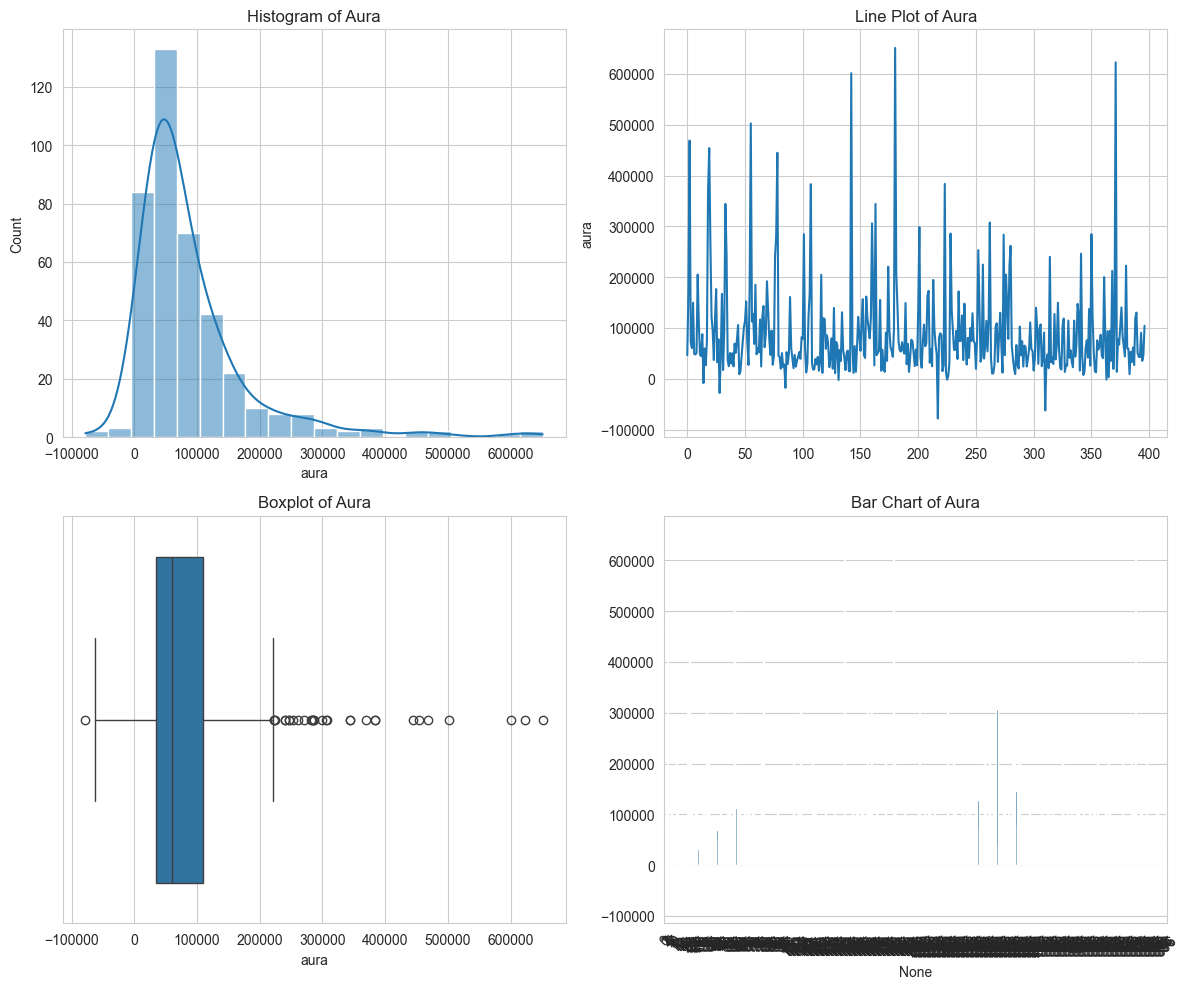

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming user_stats_df['aura'] is already available in the user's environment
aura_data = user_stats_df['aura']

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram
sns.histplot(aura_data, bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Histogram of Aura")

# Line plot
sns.lineplot(data=aura_data, ax=axes[0, 1])
axes[0, 1].set_title("Line Plot of Aura")

# Boxplot
sns.boxplot(x=aura_data, ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of Aura")

# Bar chart (Assuming categorical counts if aura is categorical)
if aura_data.dtype == 'object':
    sns.countplot(y=aura_data, ax=axes[1, 1])
else:
    sns.barplot(x=aura_data.index, y=aura_data.values, ax=axes[1, 1])
axes[1, 1].set_title("Bar Chart of Aura")

# Rotate x-labels for better visibility in bar chart
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout and show
plt.tight_layout()
plt.show()


In [36]:
user_stats_df[['user', 'aura']].sort_values(by='aura').tail(50)

,user,aura
155,Vidke04,161811.5
208,cr7vaibhav,163611.0
30,Casanovaa,167259.0
106,Nebko16,168265.5
235,ertagon_,171889.0
161,Wii_Gii,172355.0
209,cringeuss,173169.0
1,0buddha,173987.0
25,BenXBari,176452.0
54,Footstep_,178800.0


In [37]:
user_stats_df[['user', 'spam_count']].sort_values(by='spam_count').head(50)

,user,spam_count
57,GMV8,0.0
156,VincentVonBroccoli,0.0
290,mindlit,0.0
188,blakbilt,0.0
132,S4SK__,0.0
120,Prospa,0.0
226,e1shayeb,0.0
79,JCake,0.0
75,ItzDampSandwich,0.0
72,Ice_Saiyan,0.0


In [38]:
print(user_stats_df[['user', 'bit']].sort_values(by='bit').tail(10))

                         user   bit
341                  shogalul   450
213                   damm1jp   650
339                   shenxir  1275
4                    1SKELTON  1275
371                   uuccugr  1950
19   Aluminiumminimumimmunity  2125
361              thebigdogjay  2350
155                   Vidke04  2375
322                 rebbel576  2725
33                CrazeE420xd  2975


In [39]:
print(user_stats_df[['user', 'longest_streak']].sort_values(by='longest_streak').tail(50))

                         user  longest_streak
177              astrologer95              35
302                 noJokeee1              35
89                   KrieSeaX              35
338          sercanwinchester              37
318                 rafa30___              37
135                 Sacred1um              37
327             rodrigo_20771              37
211                cukuLuLu41              38
76                IvanOnMyOwn              38
341                  shogalul              38
61                   Gregg_69              39
41               DonMascarpon              39
350                  stan_iv4              39
247                    fuzok4              40
24                   BLAS1905              41
326               riesenklotz              42
59                Georgie1471              44
169              adevogado0_0              44
208                cr7vaibhav              45
240                finskbamse              45
17              Adevogado__33     

In [40]:
# Assuming user_stats_df is your DataFrame
unique_words = user_stats_df['most_common_word_1'].unique()

# If you want to print them
print(unique_words)

['xqc32' 'LOL' 'ome44' 'omE' 'hi' 'I' 'how' 'mhm' 'Keepo' 'speed1' 'FEIN'
 '1' '!play' 'NOWAYING' 'Joel' 'buh' '!boost' 'doro' 'ome99' 'PepeLaugh'
 'paul' 'nt' 'no' 'Doro' 'omgBruh' 'English' 'LUL' 'lul' 'om' 'bro' 'qq'
 'druskiDance' 'arnoldHalt' 'LO' 'jah' 'jagger20LUL' '@dorozea' 'im'
 'OOOO' 'loeyaKEKW' 'BANGER' 'LULW' 'OMEGALUL' 'RaveTime' 'Nebko16' 'Who'
 'xD' 'bye' 'go' 'ReallyMad' '-' 'Listening' 'WW' 'classic' 'Smurfing'
 'dome37' 'lol' 'WatchingStream' '->' 'iam' 'Sadge' 'or' ':D' 'game' 'aga'
 'Banger' 'PagMan' 'What' 'SPOILER' 'ur' 'erbyMariodance' 'Hai'
 'dorozeaLOVE' 'gg' 'ICANT' 'dorozeaHey' 'BangbooBounce' 'chat' 'lmao'
 'raid' 'xd' 'DORO' 'prePffttt' 'Yay' 'DinoDance' 'finskbamse'
 'dorozeaTouchingyou' ':0' 'klimzaOMEYES' 'ome32' 'omEE' 'WAJAJA' 'YEP'
 'an' 'Clap' 'BOOM' '😂😂😂' ':))' 'ome808' 'STREAMER' 'You' 'applause'
 'FeelsWowMan' 'buhFlipExplode' 'paaaat_' 'peroni' 'mikuPls' 'Pffttt'
 'why' 'find' 'forsenE' 'RAID' 'dorozeaSlam' 'moustache' "it's" 'Alright'
 'forsen

In [41]:
# Assuming user_stats_df is your DataFrame
unique_words = user_stats_df['most_common_word_2'].unique()

# If you want to print them
print(unique_words)

['speed1' 'no' 'FEIN' 'PepeLaugh' 'bro' 'guys' 'This' 'yo' 'Pffttt'
 'Sadding' 'xd' 'EZ' '\U000e0000' 'DORO' 'FLASHBANG' 'LOL' 'mhm' 'ome44'
 'Tier' 'OOOO' 'hi' 'gg' '!boost' 'hai' 'xD' 'IVANA' 'lol' 'qq' 'Im'
 'dashmoGIGA' 'gn' 'jah' 'Joel' 'lmao' 'I' 'hiii' 'bye' 'NODDERS'
 'OMEGALUL' '@dorozea' 'LMAOFREAKY' 'CaitThinking' 'Only' 'AREYOUAGIRL'
 'LUL' 'Galketbi77' 'DinoDance' "it's" '!play' 'im' 'cheerleaders'
 'Smurfing' 'nyanPls' 'dorozeaDoroScared' 'doro' 'OMEYES' 'WutFace' 'Doro'
 'ffeeveClap' 'BigSad' '))' 'om' 'ratomilton' 'kbgPls' 'LETSGO' 'WW'
 'Cinema' 'ICANT' 'catAsk' 'owoCheer' 'elo?' 'LO' 'good' 'DaRRa' '●'
 'catJAM' 'paul' 'DoroCheer' 'YEP' 'Riyadh_z21' 'Xd' 'ome5' 'KKonaW'
 'TITANHOLO' 'WhySoSerious' 'VODs' 'me' 'PINK' '@Martin_Gales' 'or' 'omE'
 'HUH' 'You' 'BLOCK' 'erbyLuigidance' '😭' 'dorozeaSlam' 'GoldPLZ' '@oJov'
 'ı' 'forsenPls' 'Kappa' 'yes' 'o7' 'muted' 'dorozeaDoroMock' 'game'
 'WideRaveTime' 'JinxLUL' 'how' 'Alarm' 'big' ':D' 'ur' ',' 'yeah' 'TEAM'
 'FeelsWowMa

In [42]:
# Assuming user_stats_df is your DataFrame
unique_words = user_stats_df['most_common_word_3'].unique()

# If you want to print them
print(unique_words)

['wideSpeedLaugh3' 'omE' '\U000e0000' 'LO' 'XD' '!play' 'LOL' 'You'
 '@Martin_Gales' 'speed1' 'FEIN' 'I' 'cheerleaders' 'jah' 'TEAM' 'ome32'
 'FEET' 'SPOILER' 'An' 'What' 'ta' 'me' 'GO' 'dorozeaTouchingyou' "you're"
 'OMEYES' 'OOOO' 'ome44' 'LUL' 'BANGER' 'bro' 'om' 'no' 'ome96' 'YEP'
 'Clueless' 'im' 'mhm' 'subscribed' 'nice' ':D' '[warning]' 'doro'
 'Cheer1000' 'gifted' 'see' '@dorozea' 'Doro' 'up' 'bye' 'xar2EDM'
 'dorozeaDoroEvil' 'ok' 'hesRight' 'WW' 'Banger' 'W' 'daisyl3Nodders' 'o7'
 'game' '<3' 'yea' 'aga' 'OMEGALUL' 'gg' 'xdd' 'yes' 'pepePoint'
 'PepeLaugh' 'am' 'NO' 'PogU' 'PAUSENEMOGU' 'or' 'tuah!' '+1' 'hi' 'ome10'
 "Don't" 'LETSGO' 'TwitchConHYPE' 'used' "it's" 'plinkVibe' '!boost' 'HUH'
 'lol' 'happi' 'Tier' 'hiii' 'ICANT' '...' 'discord' 'War' 'fein' 'how'
 'ur' 'DORO' '😭' 'stream' 'yyjPopcorn' 'good' 'lets' 'BOOM' 'dorozeaAlert'
 'SeemsGood' ':(' 'play' '😂' 'F' 'why' 'caseohWiijams' 'peepoHey'
 'dorozeaDoroPogShake' 'go' 'BloodTrail' 'qq' 'whats' 'hai' 'ome5' 'lmao'
 "I

In [43]:
user_stats_df[user_stats_df['user']=='balintboss']

,user,total_messages,total_words,word_per_message,avg_message_per_stream,most_common_word_1,most_common_word_1_count,most_common_word_2,most_common_word_2_count,most_common_word_3,...,last_message_date,last_message_text,cheer,achievements,spam_count,words_result,warn_count,bit,gifts,aura
180,balintboss,48624,187057,3.84701,123.411168,I,3748,LOL,2751,TEAM,...,2025-08-14 18:56:30+02:00,so on saturday? see you,0,"[1, 1, 1, 1, 1]",1668.0,"[LOL, 2751, doroL, 1384, dome32, 1137]",4,0,0.0,651166.0


In [44]:
user_stats_df[user_stats_df['user']=='Aluminiumminimumimmunity']

,user,total_messages,total_words,word_per_message,avg_message_per_stream,most_common_word_1,most_common_word_1_count,most_common_word_2,most_common_word_2_count,most_common_word_3,...,last_message_date,last_message_text,cheer,achievements,spam_count,words_result,warn_count,bit,gifts,aura
19,Aluminiumminimumimmunity,13962,43400,3.108437,36.742105,FEIN,4647,ome44,3377,SPOILER,...,2025-08-14 18:56:31+02:00,bye bye,20755,"[1, 1, 1, 0, 0]",1070.0,"[ome44, 3377, hi, 1215, bye, 1185]",40,2125,61.0,453945.0


In [45]:
user_stats_df[user_stats_df['user']=='Typhu25']


,user,total_messages,total_words,word_per_message,avg_message_per_stream,most_common_word_1,most_common_word_1_count,most_common_word_2,most_common_word_2_count,most_common_word_3,...,last_message_date,last_message_text,cheer,achievements,spam_count,words_result,warn_count,bit,gifts,aura
153,Typhu25,27889,338446,12.135466,92.963333,FEIN,136993,ome44,50769,speed1,...,2025-08-14 16:12:00+02:00,hi dash,510,"[1, 1, 1, 1, 0]",4451.0,"[ome44, 50769, speed1, 5712, ome52, 1550]",1,0,0.0,46609.0


In [46]:
user_stats_df.nlargest(10, 'word_per_message')

,user,total_messages,total_words,word_per_message,avg_message_per_stream,most_common_word_1,most_common_word_1_count,most_common_word_2,most_common_word_2_count,most_common_word_3,...,last_message_date,last_message_text,cheer,achievements,spam_count,words_result,warn_count,bit,gifts,aura
118,PotatBotat,601,8735,14.534110,5.366071,-,639,●,372,used,...,2025-08-14 17:33:10+02:00,"󠀀👤balintboss added dd in #dorozea 1d, 1h, 32m,...",0,"[0, 1, 0, 0, 0]",48.0,"[ome44, 118, speed1, 80, LOL, 71]",0,0,0.0,119345.0
142,StreamElements,37720,505524,13.402015,95.736041,->,13687,VODs,9298,discord,...,2025-08-14 18:44:56+02:00,-Twitter: https://twitter.com/dorozeaxd -TikT...,0,"[1, 1, 1, 1, 1]",697.0,"[WW, 2460, speed1, 2072, CS2, 1152]",0,0,0.0,601347.0
153,Typhu25,27889,338446,12.135466,92.963333,FEIN,136993,ome44,50769,speed1,...,2025-08-14 16:12:00+02:00,hi dash,510,"[1, 1, 1, 1, 0]",4451.0,"[ome44, 50769, speed1, 5712, ome52, 1550]",1,0,0.0,46609.0
20,AnAnonymousGifter,1314,13142,10.001522,14.282609,1,1324,Tier,1314,An,...,2025-08-13 16:17:39+02:00,An anonymous user gifted a Tier 1 sub to wext8...,0,"[1, 0, 0, 0, 0]",1034.0,"[None, 0, None, 0, None, 0]",0,0,1783.0,270436.0
55,Fossabot,7681,74345,9.679078,24.003125,English,7209,Only,7208,[warning],...,2025-08-14 18:54:07+02:00,"@PANATFASHI, English Only In Chat so mods can ...",0,"[1, 1, 1, 1, 1]",6.0,"[mods, 5880, Dorozea, 12, War, 3]",1,0,0.0,502533.0
313,peroni_nasturo_azuro,1735,15745,9.074928,25.895522,peroni,420,drink,146,man,...,2024-10-20 19:04:01+02:00,@1206paul_ i refreshed and the code isnt in ch...,0,"[1, 0, 1, 0, 0]",6.0,"[Pffttt, 31, life, 16, ICANT, 16]",0,0,0.0,20945.0
257,hanepirukas1,1216,10661,8.767270,33.777778,YEP,273,Hmm,90,then,...,2024-10-03 17:35:58+02:00,(fart),300,"[1, 0, 0, 0, 0]",5.0,"[YEP, 273, Hmm, 90, NODDERS, 43]",0,0,0.0,39726.0
197,captainmark2024,758,6476,8.543536,42.111111,LUL,101,I,96,it's,...,2025-03-15 16:40:06+01:00,trump: Doro must play for 10K in CS or it will...,0,"[0, 0, 0, 0, 0]",2.0,"[life, 5, OK, 4, hi, 4]",0,0,0.0,25040.0
125,Randy2D,1878,15445,8.224175,27.217391,LUL,587,I,448,lol,...,2025-08-11 15:12:23+02:00,1,0,"[0, 0, 0, 0, 0]",10.0,"[LOL, 85, bye, 41, lmao, 21]",1,0,0.0,79678.0
106,Nebko16,663,4932,7.438914,28.826087,Nebko16,378,Tier,376,gifted,...,2025-07-12 01:59:24+02:00,bye doro and shat,16442,"[0, 0, 0, 0, 0]",318.0,"[bye, 5, o7, 4, job, 1]",0,425,1178.0,168265.5


In [47]:
user_stats_df.nlargest(10, 'total_streams')

,user,total_messages,total_words,word_per_message,avg_message_per_stream,most_common_word_1,most_common_word_1_count,most_common_word_2,most_common_word_2_count,most_common_word_3,...,last_message_date,last_message_text,cheer,achievements,spam_count,words_result,warn_count,bit,gifts,aura
142,StreamElements,37720,505524,13.402015,95.736041,->,13687,VODs,9298,discord,...,2025-08-14 18:44:56+02:00,-Twitter: https://twitter.com/dorozeaxd -TikT...,0,"[1, 1, 1, 1, 1]",697.0,"[WW, 2460, speed1, 2072, CS2, 1152]",0,0,0.0,601347.0
180,balintboss,48624,187057,3.847010,123.411168,I,3748,LOL,2751,TEAM,...,2025-08-14 18:56:30+02:00,so on saturday? see you,0,"[1, 1, 1, 1, 1]",1668.0,"[LOL, 2751, doroL, 1384, dome32, 1137]",4,0,0.0,651166.0
19,Aluminiumminimumimmunity,13962,43400,3.108437,36.742105,FEIN,4647,ome44,3377,SPOILER,...,2025-08-14 18:56:31+02:00,bye bye,20755,"[1, 1, 1, 0, 0]",1070.0,"[ome44, 3377, hi, 1215, bye, 1185]",40,2125,61.0,453945.0
2,1206paul_,22839,122377,5.358247,62.231608,ome44,3989,FEIN,2525,󠀀,...,2025-08-14 17:21:26+02:00,🚁,200,"[1, 1, 1, 1, 0]",2029.0,"[ome44, 3989, LETSGO, 996, WW, 700]",0,0,1.0,468934.0
181,banties_x,40433,156138,3.861648,111.693370,speed1,8811,FEIN,7161,ome44,...,2025-08-13 15:20:25+02:00,@W1r3lesss heh i can carry if the needs arise,10,"[1, 1, 1, 1, 1]",5052.0,"[speed1, 8811, ome44, 6370, widetime, 2885]",3,400,7.0,205717.0
107,Nightbot,2744,19140,6.975219,7.817664,Who,459,elo?,459,tuah!,...,2025-08-14 17:23:43+02:00,August 14th 17:23:43 CEST,0,"[1, 1, 0, 1, 0]",16.0,"[BUSSERS, 5, None, 0, None, 0]",0,0,0.0,382994.0
18,Aloddin,7944,44149,5.557528,23.228070,I,1226,mhm,1128,FEET,...,2025-08-13 17:40:23+02:00,ReallyMad,120,"[1, 1, 0, 1, 1]",158.0,"[mhm, 1128, o7, 317, GIGACHAIR, 234]",0,0,0.0,369789.0
163,Zeololz,6519,29680,4.552846,20.245342,aga,303,omE,292,ur,...,2025-08-13 17:37:18+02:00,12h cs stream social experiment,0,"[1, 1, 1, 1, 0]",6.0,"[omE, 292, Smile, 146, mhm, 136]",4,0,0.0,344130.0
279,klimzaa,23318,135294,5.802127,72.641745,ome44,12304,ome52,8158,fein,...,2025-08-13 17:47:14+02:00,1 ranked ome51,0,"[1, 1, 1, 1, 0]",1778.0,"[ome44, 12304, ome52, 8158, fein, 7668]",0,0,0.0,222636.0
55,Fossabot,7681,74345,9.679078,24.003125,English,7209,Only,7208,[warning],...,2025-08-14 18:54:07+02:00,"@PANATFASHI, English Only In Chat so mods can ...",0,"[1, 1, 1, 1, 1]",6.0,"[mods, 5880, Dorozea, 12, War, 3]",1,0,0.0,502533.0


In [48]:
user_stats_df['total_streams'].describe()

count    397.000000
mean      78.153652
std       73.384618
min        3.000000
25%       30.000000
50%       54.000000
75%      101.000000
max      394.000000
Name: total_streams, dtype: float64

In [49]:
user_stats_df.sort_values(by='last_message_date').head(25)

,user,total_messages,total_words,word_per_message,avg_message_per_stream,most_common_word_1,most_common_word_1_count,most_common_word_2,most_common_word_2_count,most_common_word_3,...,last_message_date,last_message_text,cheer,achievements,spam_count,words_result,warn_count,bit,gifts,aura
300,nevadasieera,519,2234,4.304432,47.181818,FeelsWowMan,37,FeelsBadMan,26,:O,...,2024-06-11 14:27:10+02:00,i called her friend and now she thinks she's n...,0,"[0, 0, 0, 0, 0]",0.0,"[FeelsWowMan, 37, FeelsBadMan, 26, BibleThump,...",0,0,0.0,16259.0
383,xxxflower1,791,2945,3.723135,79.100000,OMEGALUL,47,!play,24,PepeLaugh,...,2024-06-24 14:30:32+02:00,alright,0,"[0, 0, 0, 0, 0]",11.0,"[OMEGALUL, 47, PepeLaugh, 22, hi, 15]",0,0,0.0,9090.0
128,RealDrLing,661,2509,3.795764,73.444444,LUL,64,owoCheer,42,I,...,2024-06-24 21:14:23+02:00,bye,0,"[0, 0, 0, 0, 0]",12.0,"[owoCheer, 42, lmao, 8, OMEGALUL, 8]",0,0,10.0,11209.0
196,cake_for_me_,606,784,1.293729,16.833333,lol,52,yes,41,gg,...,2024-07-13 19:08:40+02:00,hi,0,"[0, 0, 0, 0, 0]",7.0,"[gg, 31, hi, 27, bye, 26]",0,0,0.0,51519.0
129,Risc__V,2908,10524,3.618982,48.466667,classic,156,YEP,132,bro,...,2024-07-24 18:24:00+02:00,CLOWNDETECTED,0,"[0, 0, 0, 0, 0]",5.0,"[classic, 156, YEP, 132, mhm, 66]",0,0,0.0,72337.0
140,SercanLeaxl,687,1578,2.296943,68.700000,WatchingStream,47,LOL,36,...,...,2024-08-01 15:48:36+02:00,#ad,0,"[0, 0, 0, 0, 0]",4.0,"[WatchingStream, 47, LOL, 36, LL, 8]",1,0,0.0,15259.0
261,icep1cke,1389,2282,1.642909,17.362500,Clap,295,EZ,120,!play,...,2024-08-09 20:48:43+02:00,!play 󠀀,100,"[0, 0, 0, 0, 0]",10.0,"[Clap, 295, EZ, 120, DoroCheer, 95]",0,0,10.0,115281.0
333,saadr223,678,3342,4.929204,23.379310,bro,53,!PLAY,27,game,...,2024-08-22 14:55:02+02:00,bro we use water,0,"[0, 0, 0, 0, 0]",3.0,"[arthur, 5, life, 3, gg, 2]",0,0,0.0,32907.0
46,EnthrallPain,589,3359,5.702886,53.545455,PepeLaugh,151,OMEGALUL,45,Clueless,...,2024-09-03 19:59:24+02:00,If you put ice behind your fan it's a mini ac ...,0,"[0, 0, 1, 0, 0]",1.0,"[PepeLaugh, 151, OMEGALUL, 45, Clueless, 45]",0,0,0.0,14412.0
231,enseje,1901,7808,4.107312,41.326087,xd,119,@Martin_Gales,94,@dorozea,...,2024-09-07 14:51:40+02:00,the forearms holy fuck,100,"[0, 0, 0, 0, 0]",2.0,"[mhm, 57, peepoLove, 50, Prayge, 40]",0,0,1.0,57109.0


In [50]:
user_stats_df['buster_usage'].describe()

count    397.000000
mean       0.352645
std        1.441301
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       15.000000
Name: buster_usage, dtype: float64

In [51]:
user_stats_df[['user', 'cheer']].sort_values(by='cheer').tail(50)

,user,cheer
264,ileadarius27,90
155,Vidke04,100
62,Greksallad,100
44,Drizzie3S,100
231,enseje,100
261,icep1cke,100
326,riesenklotz,100
327,rodrigo_20771,100
152,Trizze,110
314,phrank007,110


In [52]:
user_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype                        
---  ------                    --------------  -----                        
 0   user                      397 non-null    object                       
 1   total_messages            397 non-null    int64                        
 2   total_words               397 non-null    int64                        
 3   word_per_message          397 non-null    float64                      
 4   avg_message_per_stream    397 non-null    float64                      
 5   most_common_word_1        397 non-null    object                       
 6   most_common_word_1_count  397 non-null    int64                        
 7   most_common_word_2        397 non-null    object                       
 8   most_common_word_2_count  397 non-null    int64                        
 9   most_common_word_3        397 non-null    o

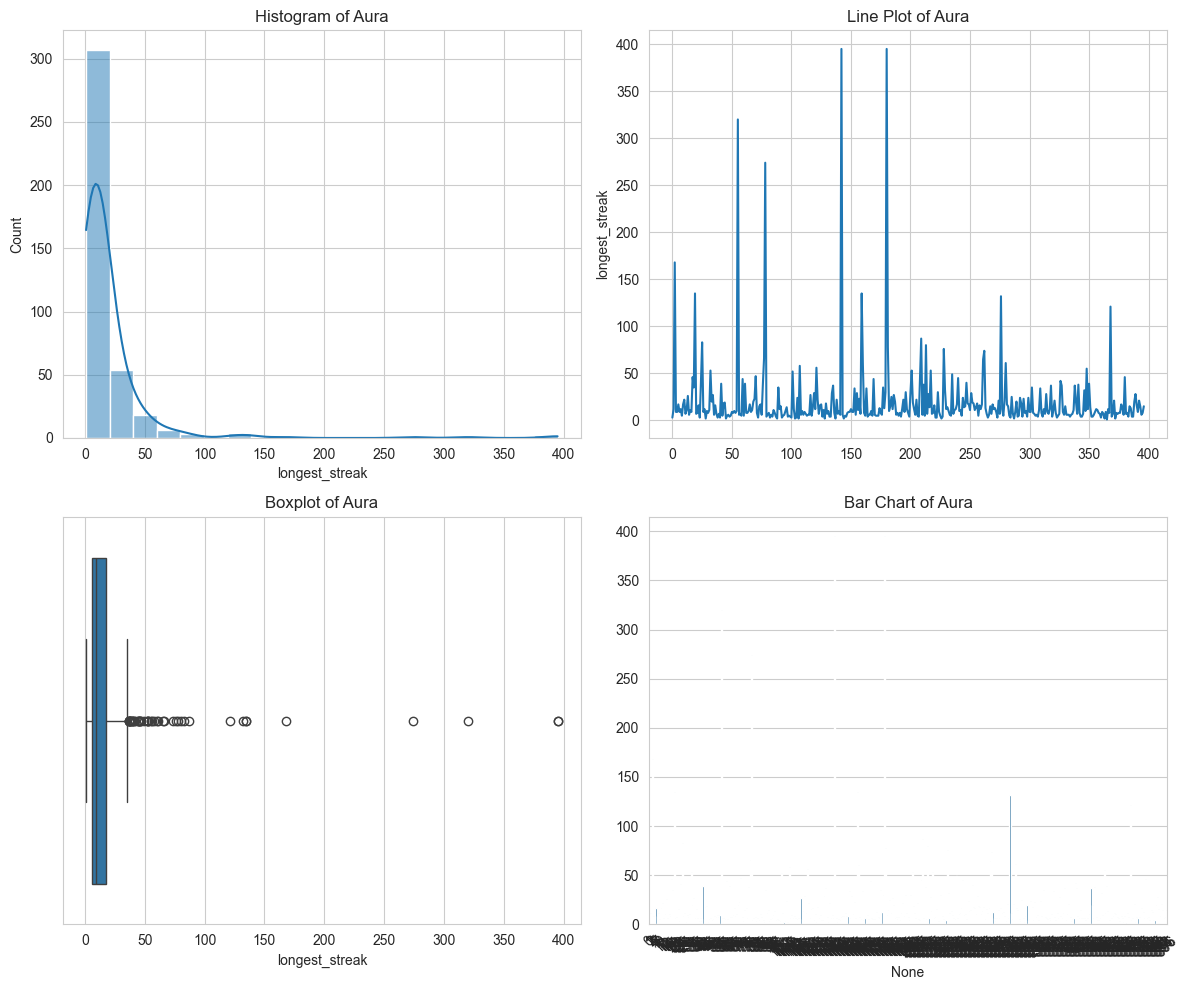

In [53]:

# Assuming user_stats_df['aura'] is already available in the user's environment
longest_streak_data = user_stats_df['longest_streak']

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram
sns.histplot(longest_streak_data, bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Histogram of Aura")

# Line plot
sns.lineplot(data=longest_streak_data, ax=axes[0, 1])
axes[0, 1].set_title("Line Plot of Aura")

# Boxplot
sns.boxplot(x=longest_streak_data, ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of Aura")

# Bar chart (Assuming categorical counts if aura is categorical)
if longest_streak_data.dtype == 'object':
    sns.countplot(y=longest_streak_data, ax=axes[1, 1])
else:
    sns.barplot(x=longest_streak_data.index, y=longest_streak_data.values, ax=axes[1, 1])
axes[1, 1].set_title("Bar Chart of Aura")

# Rotate x-labels for better visibility in bar chart
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout and show
plt.tight_layout()
plt.show()


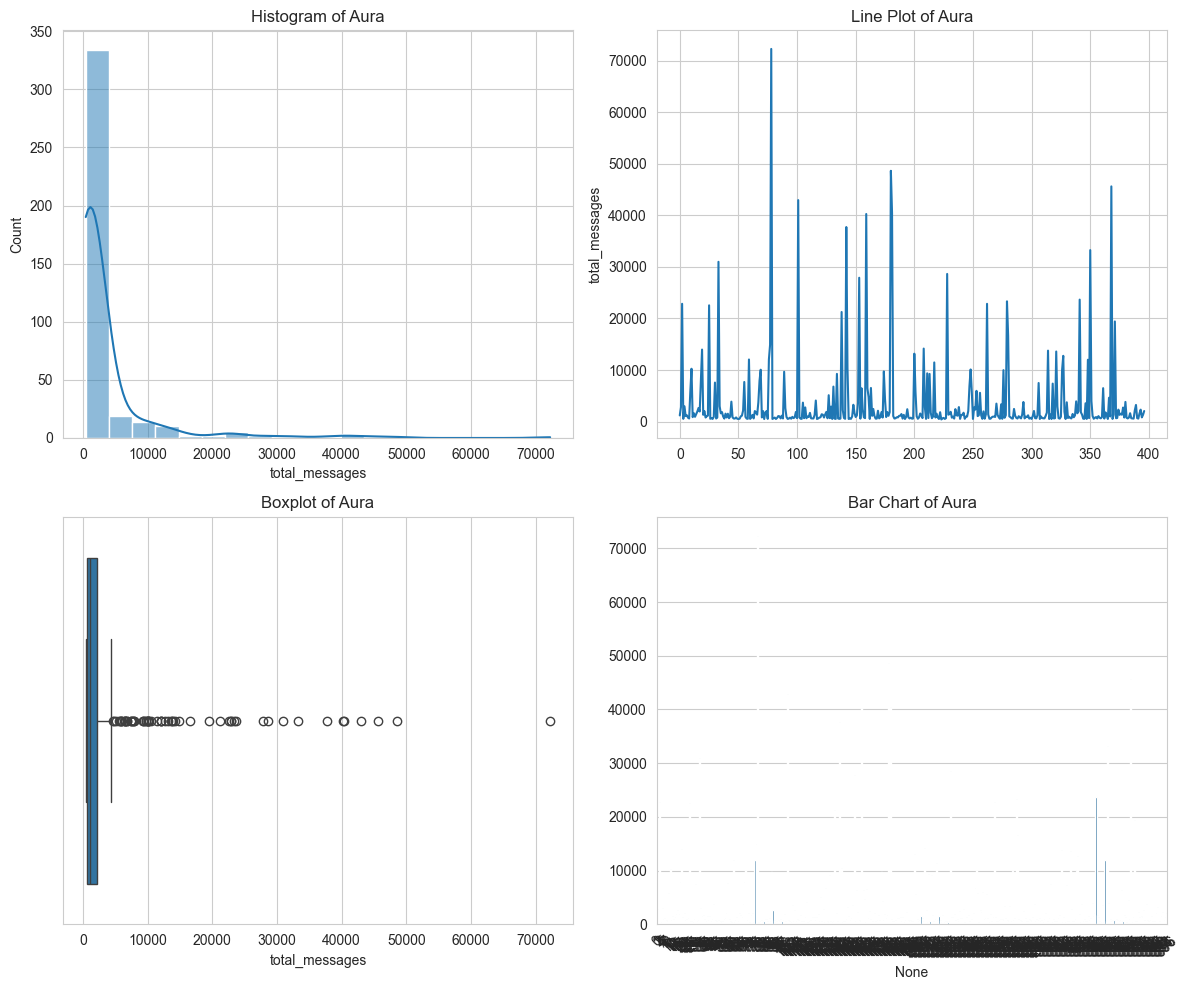

In [54]:

# Assuming user_stats_df['aura'] is already available in the user's environment
total_streams = user_stats_df['total_messages']

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram
sns.histplot(total_streams, bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Histogram of Aura")

# Line plot
sns.lineplot(data=total_streams, ax=axes[0, 1])
axes[0, 1].set_title("Line Plot of Aura")

# Boxplot
sns.boxplot(x=total_streams, ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of Aura")

# Bar chart (Assuming categorical counts if aura is categorical)
if total_streams.dtype == 'object':
    sns.countplot(y=total_streams, ax=axes[1, 1])
else:
    sns.barplot(x=total_streams.index, y=total_streams.values, ax=axes[1, 1])
axes[1, 1].set_title("Bar Chart of Aura")

# Rotate x-labels for better visibility in bar chart
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout and show
plt.tight_layout()
plt.show()


In [55]:
user_stats_df[['user', 'total_messages']].sort_values(by='total_messages').tail(50)

,user,total_messages
163,Zeololz,6519
131,Roonss,6783
247,fuzok4,6855
318,rafa30___,7363
306,oJov,7481
30,Casanovaa,7562
55,Fossabot,7681
68,HoneyKick,7904
18,Aloddin,7944
213,damm1jp,9245


In [56]:
user_stats_df['total_messages'].describe()

count      397.000000
mean      3528.476071
std       7648.388458
min        413.000000
25%        642.000000
50%       1022.000000
75%       2150.000000
max      72253.000000
Name: total_messages, dtype: float64

In [57]:
user_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype                        
---  ------                    --------------  -----                        
 0   user                      397 non-null    object                       
 1   total_messages            397 non-null    int64                        
 2   total_words               397 non-null    int64                        
 3   word_per_message          397 non-null    float64                      
 4   avg_message_per_stream    397 non-null    float64                      
 5   most_common_word_1        397 non-null    object                       
 6   most_common_word_1_count  397 non-null    int64                        
 7   most_common_word_2        397 non-null    object                       
 8   most_common_word_2_count  397 non-null    int64                        
 9   most_common_word_3        397 non-null    o

In [58]:
# Method 1: Select specific columns by name
selected_columns = ['user','mention_usage','mention_chater','total_messages', 'aura', 'total_words','most_common_word_1','most_common_word_2','most_common_word_3','total_streams','longest_streak','first_message_date','first_message_text','last_message_date','last_message_text','achievements','words_result']
subset_df = user_stats_df[selected_columns]



In [59]:
bots = ['StreamElements', 'Nightbot', 'fuzok4', 'riesenklotz', 'AnAnonymousGifter', 'Fossabot', 'peroni_nasturo_azuro']

subset_df = subset_df[~subset_df['user'].isin(bots)].reset_index(drop=True)

In [60]:
# Export to json
#subset_df.to_json('usersdata.json', index=False)

subset_df.to_json("usersdata.json", orient="records", date_format="iso")

In [61]:
def calculate_user_stats_optimized(df, data, words_list):
    """Calculates various statistics for each user (optimized)."""
    user_stats = []

    for user, user_df in df.groupby("user"):
        messages = user_df["message"].tolist()
        total_messages = len(messages)

        # Efficient total words
        total_words = user_df['message'].str.split().str.len().sum()
        word_per_message = total_words / total_messages if total_messages > 0 else 0

        # Efficient most common words
        all_messages = " ".join(messages)
        most_common_words = Counter(all_messages.split()).most_common(3)
        common_words = [word for word, _ in most_common_words] + [None] * (3 - len(most_common_words))
        common_counts = [count for _, count in most_common_words] + [0] * (3 - len(most_common_words))

        # Efficient keyword usage
        speed1_usage = user_df["message"].str.contains(r"\bspeed1\b", regex=True).sum()
        speed2_usage = user_df["message"].str.contains(r"\bspeed2\b", regex=True).sum()
        ome44_usage = user_df["message"].str.contains(r"\bome44\b", regex=True).sum()
        joel_usage = user_df["message"].str.contains(r"\bJoel\b", regex=True).sum()
        qq_usage = user_df["message"].str.contains(r"\bqq\b", regex=True).sum()
        boost_usage = user_df["message"].str.contains(r"\b!boost\b", regex=True).sum()
        smurf_usage = user_df["message"].str.contains(r"\bSmurfing\b", regex=True).sum()
        bleh_usage = user_df["message"].str.contains(r"\bBleh\b", regex=True).sum()
        play_usage = user_df["message"].str.contains('!play', regex=False).sum()
        buster_usage = user_df["message"].str.lower().str.contains('buster', regex=False).sum()
        peroni_usage = user_df["message"].str.lower().str.contains('peroni', regex=False).sum()
        fien_usage = user_df["message"].str.lower().str.contains('fien', regex=False).sum()
        mention_usage = user_df["message"].str.contains('@', regex=False).sum()
        mention_chater = data["message"].str.contains(user, regex=False).sum() # Careful with 'data' scope

        unique_streams = user_df["stream"].unique().tolist()

        first_message_date = user_df["date"].iloc[0]
        first_message_text = user_df["message"].iloc[0]
        last_message_date = user_df["date"].iloc[-1]
        last_message_text = user_df["message"].iloc[-1]

        # Identify streaks (can potentially be optimized further with vectorized diff)
        count = 1
        last = -1
        longest_streak = 1
        for e in unique_streams:
            if e == (last + 1):
                count += 1
                longest_streak = max(longest_streak, count)
            else:
                count = 1
            last = e

        # Apply the function to create a new column (try to avoid apply if possible)
        user_df["cheer_sum"] = user_df["message"].apply(extract_and_sum)
        cheer = user_df["cheer_sum"].sum()

        # Vectorized achievements
        stream_ids = [112, 184, 102, 177, 258]
        encoded_list = [1 if stream_id in user_df['stream'].values else 0 for stream_id in stream_ids]

        # Efficient filtered word count
        user_messages = user_df["message"].str.split()
        all_user_words = user_messages.explode()
        filtered_user_words = all_user_words[all_user_words.isin(words_list)]
        top_3_filtered = list(filtered_user_words.value_counts().nlargest(3).items())
        words_result = [item for sublist in top_3_filtered for item in sublist] + [None] * (6 - len(top_3_filtered) * 2)

        # Vectorized spam detection
        shifted_df = user_df.shift(1)
        time_diffs = (user_df['date'] - shifted_df['date']).dt.total_seconds()
        similarity = [SequenceMatcher(None, curr, prev).ratio() if pd.notna(prev) else 0
                      for prev, curr in zip(shifted_df['message'], user_df['message'])]
        spam_flag = (time_diffs <= 10) & (pd.Series(similarity) >= 0.6)
        spam_count = spam_flag.sum()

        user_stats.append({
            "user": user,
            "total_messages": total_messages,
            "total_words": total_words,
            "word_per_message": word_per_message,
            "avg_message_per_stream": total_messages / len(unique_streams) if unique_streams else 0,
            "most_common_word_1": common_words[0],
            "most_common_word_1_count": common_counts[0],
            "most_common_word_2": common_words[1],
            "most_common_word_2_count": common_counts[1],
            "most_common_word_3": common_words[2],
            "most_common_word_3_count": common_counts[2],
            "speed1_usage": speed1_usage,
            "speed2_usage": speed2_usage,
            "ome44_usage": ome44_usage,
            "joel_usage": joel_usage,
            "qq_usage": qq_usage,
            "bleh_usage": bleh_usage,
            "boost_usage": boost_usage,
            "buster_usage": buster_usage,
            "peroni_usage": peroni_usage,
            "fien_usage": fien_usage,
            "smurf_usage": smurf_usage,
            "play_usage": play_usage,
            "mention_usage": mention_usage,
            "mention_chater": mention_chater,
            "unique_streams": unique_streams,
            "total_streams": len(unique_streams),
            "longest_streak": longest_streak,
            "first_message_date": first_message_date,
            "first_message_text": first_message_text,
            "last_message_date": last_message_date,
            "last_message_text": last_message_text,
            "cheer": cheer,
            "achivments": encoded_list,
            "words_result": words_result,
            "spam_count": spam_count,
        })

    return pd.DataFrame(user_stats)

# Assuming 'data' and 'words_list' are defined elsewhere
#user_stats_df_optimized = calculate_user_stats_optimized(data_filtered.copy(), data, words_list)

#THIS IS NOT GOOD NOT CALCULATE THE GOOD THING IN IT

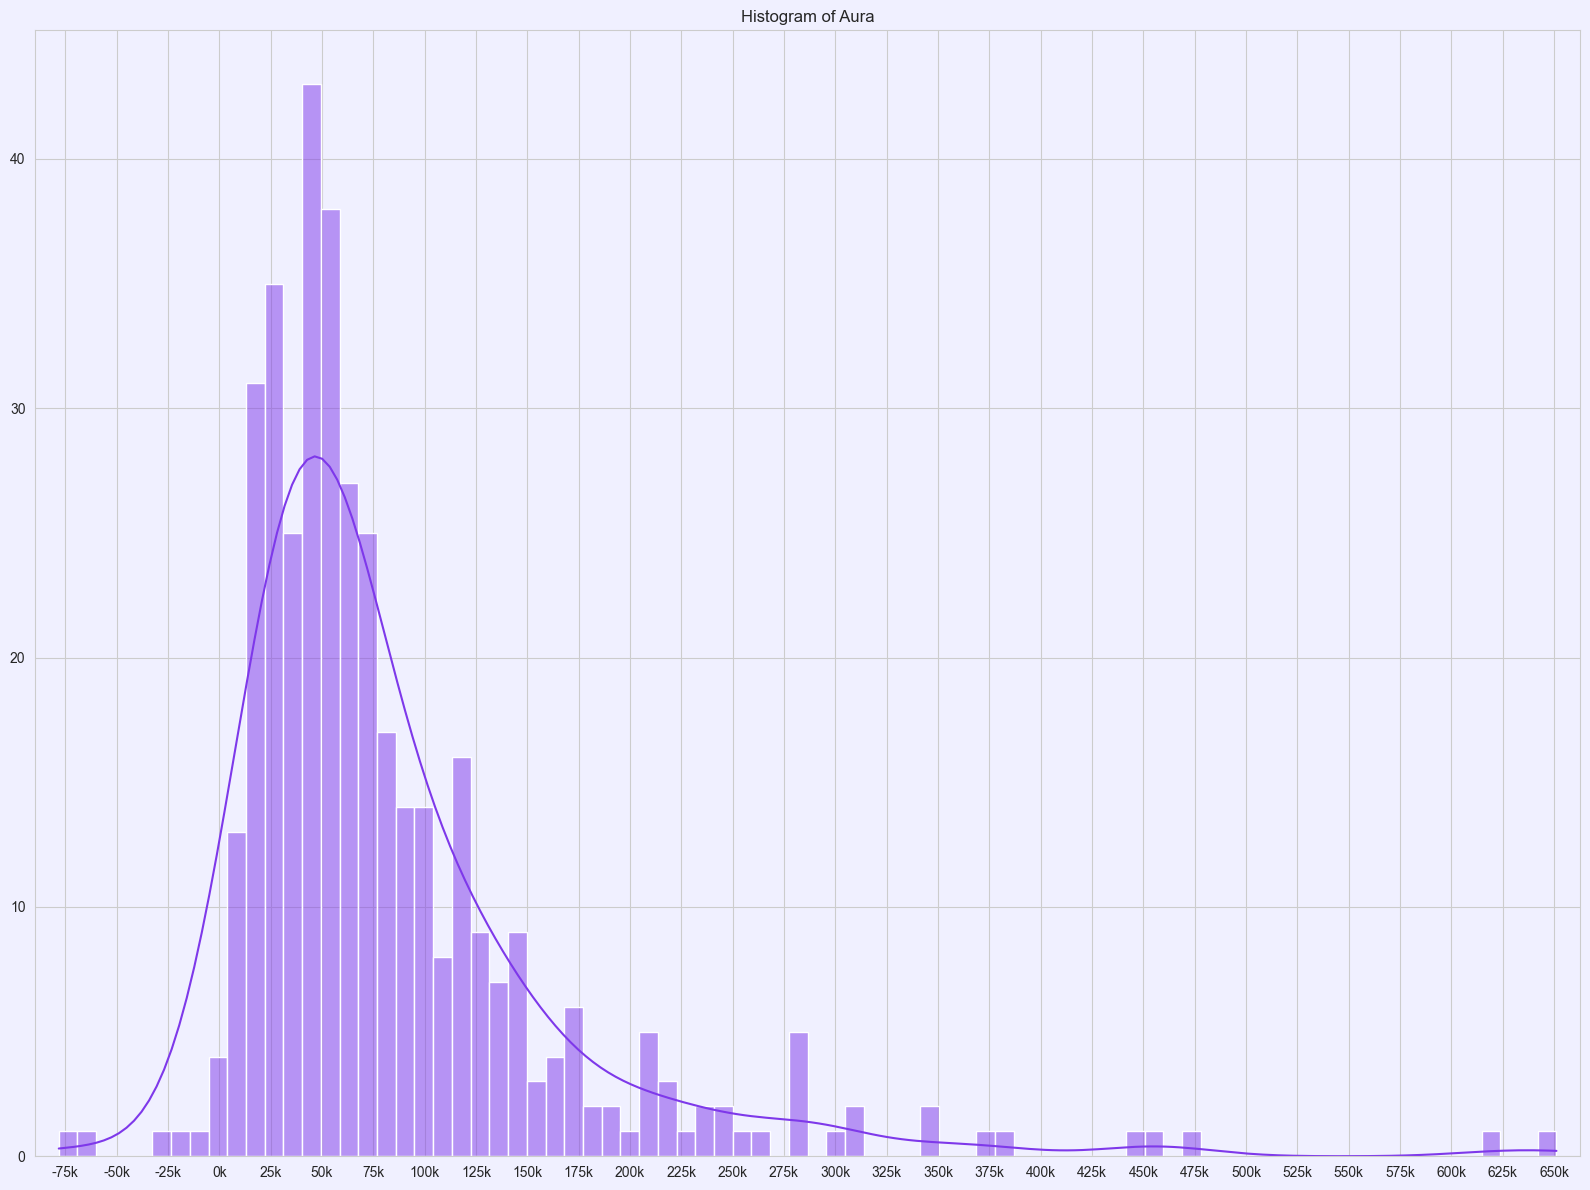

In [62]:
aura_data = subset_df['aura']

# Set style
sns.set_style("whitegrid", {"axes.facecolor": "#F0F0FF", "figure.facecolor": "#F0F0FF"})

# Create a single figure
plt.figure(figsize=(16, 12))

# Histogram with KDE
sns.histplot(   aura_data,
                bins=80, 
                kde=True,
                fill=True,
                color='#7E38EA')
plt.title("Histogram of Aura")

# Format x-axis labels to show "k" notation every 25k
from matplotlib.ticker import FuncFormatter

def thousands_formatter(x, pos):
    return f'{int(x/1000)}k'

plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(25000))  # Set ticks every 25,000

# Get current x limits
x_min, x_max = plt.xlim()

# Adjust the limits to remove one tick from start and end
new_x_min = x_min + 25000
new_x_max = x_max - 25000
plt.xlim(new_x_min, new_x_max)

plt.xlabel("")  # Remove x-axis label
plt.ylabel("")  # Remove y-axis label

plt.tight_layout()
plt.show()


In [63]:
aura_data.describe()

count       390.000000
mean      84444.024359
std       85541.837570
min      -78166.000000
25%       35223.250000
50%       59130.500000
75%      105495.750000
max      651166.000000
Name: aura, dtype: float64